___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("display.max_columns", 150)
pd.set_option('display.max_rows', 1000)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn.utils.validation')


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [82]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')


In [83]:
Females_columns = df_female.columns
males_columns = df_male.columns
Notunique = []
for i in Females_columns:
    if i in males_columns:
        pass
    else:Notunique.append(i)
Notunique # we are droping them any way we don't need to rename one of them , and also now we are sure that we are having the same columns names 

['SubjectId']

In [84]:
df = pd.concat([df_female,df_male],axis=0,ignore_index=True)
df

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0       10037.0                             231            1282   
1       10038.0                             194            1379   
2       10042.0                             183            1369   
3       10043.0                             261            1356   
4       10051.0                             309            1303   
...         ...                             ...             ...   
6063        NaN                             235            1353   
6064        NaN                             247            1473   
6065        NaN                             264            1394   
6066        NaN                             203            1417   
6067        NaN                             327            1523   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
6063                    312                 216          1263   
6064                    336                 234          1346   
6065                    313                 227          1280   
6066                    327                 223          1314   
6067                    358                 226          1408   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
6063                      228               193                384   
6064                      253               196                428   
6065                      245               193                407   
6066                      250               196                419   
6067                      269               225                442   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
6063                        318               241               457   
6064                        374               284               536   
6065                        367               271               501   
6066                        365               271               493   
6067                        379               275               531   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     65               338                        301   
1                     64               294                        270   
2                     69               309                        270   
3                     68               340                        294   
4                     67               300                        295   
...                  ...               ...                        ...   
6063                  70               321                        301   
6064                  76               319                        316   
6065                  74               323                        316

In [85]:

print('''
Shape of Female Dataframe is : {}
Shape of Male Dataframe is   : {}
Shape of Joined Dataframe is : {}'''.format(df_female.shape,df_male.shape,df.shape))


Shape of Female Dataframe is : (1986, 108)
Shape of Male Dataframe is   : (4082, 108)
Shape of Joined Dataframe is : (6068, 109)


## Explore Data

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, SubjectId to subjectid
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [87]:
df.select_dtypes(include=['object'])

Gender      Date Installation            Component  \
0     Female  5-Oct-10    Fort Hood         Regular Army   
1     Female  5-Oct-10    Fort Hood         Regular Army   
2     Female  5-Oct-10    Fort Hood         Regular Army   
3     Female  5-Oct-10    Fort Hood         Regular Army   
4     Female  5-Oct-10    Fort Hood         Regular Army   
...      ...       ...          ...                  ...   
6063    Male  4-Apr-12  Camp Shelby  Army National Guard   
6064    Male  4-Apr-12  Camp Shelby  Army National Guard   
6065    Male  4-Apr-12  Camp Shelby  Army National Guard   
6066    Male  4-Apr-12  Camp Shelby  Army National Guard   
6067    Male  4-Apr-12  Camp Shelby  Army National Guard   

                      Branch PrimaryMOS SubjectsBirthLocation  \
0             Combat Support        92Y               Germany   
1     Combat Service Support        25U            California   
2     Combat Service Support        35D                 Texas   
3     Combat Service Support        25U  District of Columbia   
4                Combat Arms        42A                 Texas   
...                      ...        ...                   ...   
6063             Combat Arms        11B              Colorado   
6064             Combat Arms        91B              Oklahoma   
6065             Combat Arms        13B              Oklahoma   
6066             Combat Arms        13P              Oklahoma   
6067             Combat Arms        92Y              Oklahoma   

                       Ethnicity WritingPreference  
0                            NaN        Right hand  
1                        Mexican        Right hand  
2                            NaN        Right hand  
3             Caribbean Islander        Right hand  
4                            NaN        Right hand  
...                          ...               ...  
6063  Blackfoot Cherokee Choctaw        Right hand  
6064                         NaN        Right hand  
6065                         NaN        Right hand  
6066                         NaN        Right hand  
6067                         NaN        Right hand  

[6068 rows x 9 columns]

In [88]:
df.select_dtypes(include=['object']).nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
PrimaryMOS               285
SubjectsBirthLocation    152
Ethnicity                209
WritingPreference          3
dtype: int64


        
        1: White
        2: Black
        3: Hispanic
        4: Asian
        5: Native American
        6: Pacific Islander
        8: Other                                


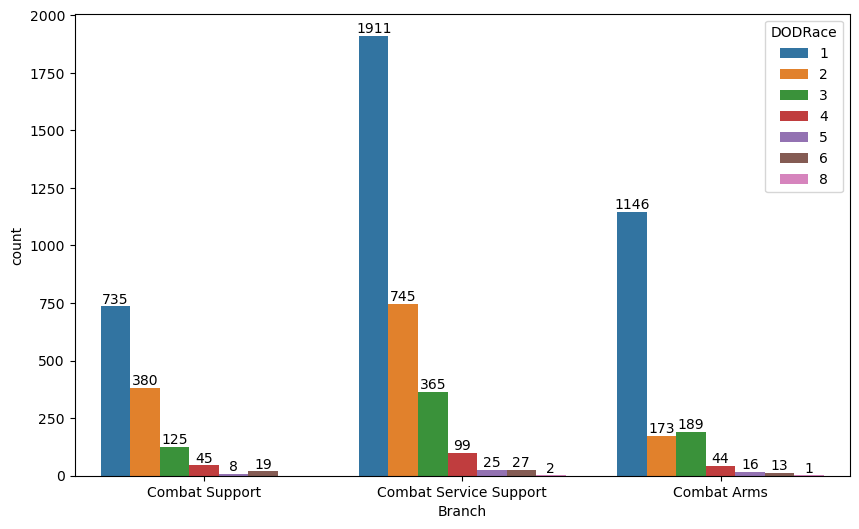

In [90]:
df.groupby('Branch')['DODRace'].value_counts().unstack()
# We can see that each class has majority in his own branch for example Class 1 which is White are in CSS more ...etc
ax=sns.countplot(data= df , x='Branch',hue='DODRace')
for i in range(df['DODRace'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')

In [91]:
import plotly.express as px

fig = px.histogram(df, x='Branch', color='DODRace', title='Branch with DODRace')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

In [92]:
df.groupby('Component')['DODRace'].value_counts().unstack() 

DODRace                   1      2      3      4     5     6    8
Component                                                        
Army National Guard  1855.0  499.0  253.0   60.0  24.0  17.0  NaN
Army Reserve          114.0   52.0   41.0    9.0   1.0   3.0  NaN
Regular Army         1823.0  747.0  385.0  119.0  24.0  39.0  3.0

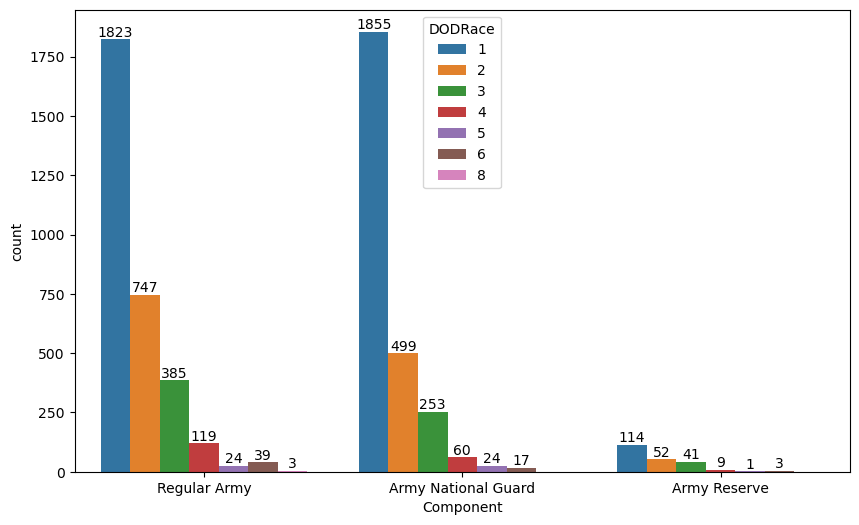

In [93]:
df.groupby('Component')['DODRace'].value_counts().unstack()
# We can see that each class has majority in his own branch for example Class 1 which is White are in CSS more ...etc
ax=sns.countplot(data= df , x='Component',hue='DODRace')
for i in range(df['DODRace'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')

In [94]:
df.groupby('WritingPreference')['DODRace'].value_counts().unstack()
# this prove that majority of people use there right hand , we will ignore this column 

DODRace                           1       2      3      4     5     6    8
WritingPreference                                                         
Either hand (No preference)    43.0    13.0    3.0    2.0   1.0   NaN  NaN
Left hand                     422.0   150.0   50.0   22.0   5.0   7.0  NaN
Right hand                   3327.0  1135.0  626.0  164.0  43.0  52.0  3.0

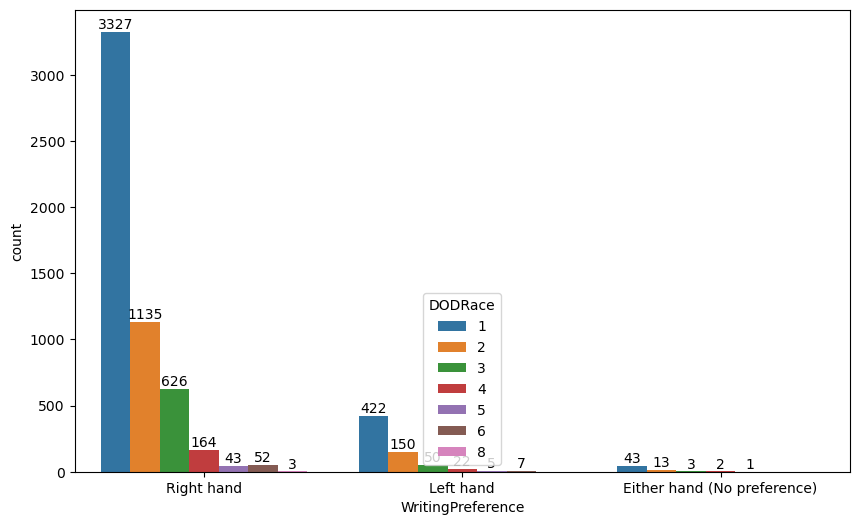

In [95]:
df.groupby('WritingPreference')['DODRace'].value_counts().unstack()
# We can see that each class has majority in his own branch for example Class 1 which is White are in CSS more ...etc
ax=sns.countplot(data= df , x='WritingPreference',hue='DODRace')
for i in range(df['DODRace'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')

In [96]:
df.groupby('Gender')['DODRace'].value_counts().unstack()

DODRace       1      2      3      4     5     6    8
Gender                                               
Female    975.0  656.0  239.0   71.0  20.0  25.0  NaN
Male     2817.0  642.0  440.0  117.0  29.0  34.0  3.0

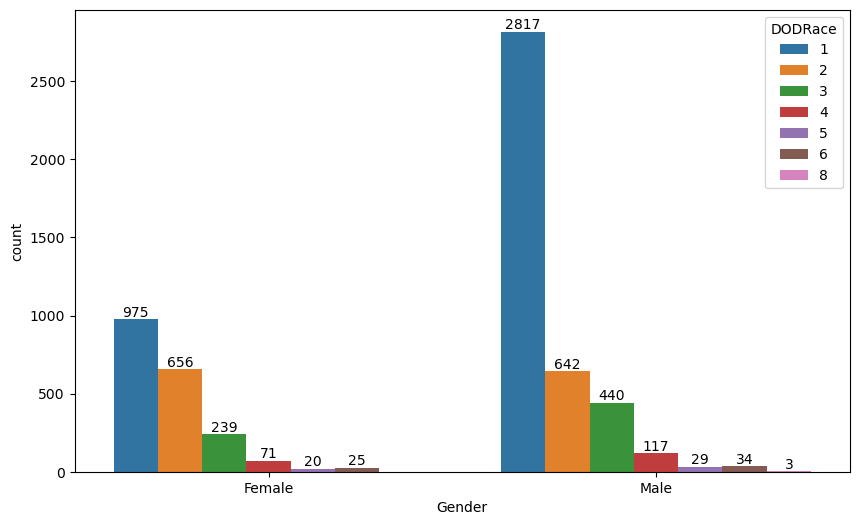

In [97]:
df.groupby('Gender')['DODRace'].value_counts().unstack()
# We can see that each class has majority in his own branch for example Class 1 which is White are in CSS more ...etc
ax=sns.countplot(data= df , x='Gender',hue='DODRace')
for i in range(df['DODRace'].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge')

In [98]:
df.groupby('Installation')['DODRace'].value_counts().unstack()

DODRace             1      2      3     4     5    6    8
Installation                                             
Camp Atterbury  338.0   77.0   17.0   8.0   1.0  NaN  NaN
Camp Shelby     776.0  238.0   97.0  23.0  17.0  9.0  NaN
Fort Bliss      624.0  177.0  124.0  19.0   9.0  8.0  2.0
Fort Bragg      217.0   90.0   66.0  12.0   5.0  7.0  NaN
Fort Drum       249.0   65.0   55.0  15.0   2.0  5.0  NaN
Fort Gordon     352.0  207.0   77.0  27.0   3.0  3.0  NaN
Fort Hood       284.0   78.0   54.0  14.0   2.0  6.0  1.0
Fort Huachuca   314.0   51.0   39.0  24.0   2.0  6.0  NaN
Fort Lee        151.0  163.0   42.0  14.0   3.0  7.0  NaN
Fort McCoy      344.0   27.0   61.0  14.0   3.0  3.0  NaN
Fort Rucker       1.0    NaN    NaN   NaN   NaN  NaN  NaN
Fort Stewart    142.0  125.0   47.0  18.0   2.0  5.0  NaN

In [99]:
df.describe().T

count          mean           std      min  \
SubjectId                       1986.0  22306.606244  20904.730297  10037.0   
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0   
acromialheight                  6068.0   1406.161338     79.091048   1115.0   
acromionradialelength           6068.0    327.374423     20.720018    249.0   
anklecircumference              6068.0    224.891397     16.051833    156.0   
axillaheight                    6068.0   1299.608767     72.022286   1038.0   
balloffootcircumference         6068.0    244.192650     16.845020    186.0   
balloffootlength                6068.0    194.754614     13.516368    151.0   
biacromialbreadth               6068.0    399.204186     30.236914    283.0   
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0   
bicristalbreadth                6068.0    274.735003     19.221034    197.0   
bideltoidbreadth                6068.0    490.754450     42.135535    357.0   
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0   
bitragionchinarc                6068.0    324.896506     17.087501    267.0   
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0   
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0   
buttockcircumference            6068.0   1020.084707     76.422643    737.0   
buttockdepth                    6068.0    241.619974     26.482986    168.0   
buttockheight                   6068.0    870.152274     54.822574    656.0   
buttockkneelength               6068.0    608.999176     33.792839    466.0   
buttockpopliteallength          6068.0    497.097561     29.082390    367.0   
calfcircumference               6068.0    386.041200     30.647180    266.0   
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   
chestbreadth                    6068.0    282.859097     20.659397    213.0   
chestcircumference              6068.0   1022.098879    100.671751    695.0   
chestdepth                      6068.0    251.738464     26.777843    170.0   
chestheight                     6068.0   1252.013184     79.583972    984.0   
crotchheight                    6068.0    825.110086     54.748240    610.0   
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0   
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0   
earbreadth                      6068.0     35.132169      3.231469     25.0   
earlength                       6068.0     62.625906      4.876264     46.0   
earprotrusion                   6068.0     22.263349      3.172715     13.0   
elbowrestheight                 6068.0    240.911338     28.509447    138.0   
eyeheightsitting                6068.0    785.914469     41.865795    654.0   
footbreadthhorizontal           6068.0     98.865359      6.657916     77.0   
footlength                      6068.0    263.033619     17.390971    198.0   
forearmcenterofgriplength       6068.0    338.766645     23.244742    258.0   
forearmcircumferenceflexed      6068.0    295.010712     30.049715    200.0   
forearmforearmbreadth           6068.0    552.075972     62.368049    376.0   
forearmhandlength               6068.0    467.007086     30.034820    342.0   
functionalleglength             6068.0   1102.049275     68.545784    835.0   
handbreadth                     6068.0     84.953362      6.346510     67.0   
handcircumference               6068.0    203.861404     15.551424    152.0   
handlength                      6068.0    189.286585     11.505788    145.0   
headbreadth                     6068.0    152.182762      6.235692    131.0   
headcircumference               6068.0    570.035267     18.291139    500.0   
headlength                      6068.0    196.334871      8.485374    168.0   
heelanklecircumference          6068.0    332.622940     22.460776    258.0   
heelbreadth                     6068.0     70.756922      5.932626     48.0   
hipb

In [100]:
df.nunique().sort_values(ascending=False)

subjectid                         4082
SubjectId                         1986
weightkg                           783
waistcircumference                 581
span                               569
verticaltrunkcircumferenceusa      522
chestcircumference                 521
stature                            481
shouldercircumference              458
overheadfingertipreachsitting      452
cervicaleheight                    452
acromialheight                     432
buttockcircumference               429
suprasternaleheight                427
chestheight                        421
axillaheight                       402
functionalleglength                383
tenthribheight                     351
waistheightomphalion               350
iliocristaleheight                 345
thighcircumference                 343
forearmforearmbreadth              335
buttockheight                      322
trochanterionheight                321
crotchheight                       318
thumbtipreach            

In [101]:
df.isna().sum().sort_values(ascending=False).head(10)

Ethnicity                4647
SubjectId                4082
subjectid                1986
acromionradialelength       0
tragiontopofhead            0
thumbtipreach               0
thighclearance              0
thighcircumference          0
tenthribheight              0
suprasternaleheight         0
dtype: int64

In [102]:
df['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
6063      Male
6064      Male
6065      Male
6066      Male
6067      Male
Name: Gender, Length: 6068, dtype: object

In [103]:
df.select_dtypes(include='number').corr()["DODRace"].sort_values(ascending=False)


DODRace                           1.000000
interpupillarybreadth             0.140017
bizygomaticbreadth                0.100792
heelbreadth                       0.076786
headbreadth                       0.055987
bitragionchinarc                  0.047683
SubjectId                         0.028523
SubjectNumericRace                0.017987
Age                               0.004738
subjectid                        -0.010020
bitragionsubmandibulararc        -0.020004
tragiontopofhead                 -0.021191
earprotrusion                    -0.029490
lowerthighcircumference          -0.037853
thighcircumference               -0.042693
earlength                        -0.042940
mentonsellionlength              -0.044308
footbreadthhorizontal            -0.053260
headcircumference                -0.054221
thighclearance                   -0.060196
buttockdepth                     -0.063854
hipbreadthsitting                -0.065287
bicepscircumferenceflexed        -0.066587
palmlength 

In [104]:
correlation_matrix = df.select_dtypes(include='number').corr()

correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.9:
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            # Check if this pair is not already in the list
            if not any((pair['Feature 1'] == variable1 and pair['Feature 2'] == variable2) or (pair['Feature 1'] == variable2 and pair['Feature 2'] == variable1) for pair in correlated_pairs):
                correlated_pairs.append({'Feature 1': variable1, 'Feature 2': variable2, 'Correlation': corr_value})

correlated_pairs_df = pd.DataFrame(correlated_pairs)

correlated_pairs_df


Feature 1                       Feature 2  \
0    abdominalextensiondepthsitting              waistcircumference   
1    abdominalextensiondepthsitting                      waistdepth   
2                    acromialheight                    axillaheight   
3                    acromialheight                 cervicaleheight   
4                    acromialheight                     chestheight   
5                    acromialheight                    crotchheight   
6                    acromialheight              iliocristaleheight   
7                    acromialheight               kneeheightsitting   
8                    acromialheight                         stature   
9                    acromialheight             suprasternaleheight   
10                   acromialheight                  tenthribheight   
11                   acromialheight            waistheightomphalion   
12                   acromialheight                     wristheight   
13                   acromialheight                        Heightin   
14            acromionradialelength             shoulderelbowlength   
15            acromionradialelength                   sleeveoutseam   
16                     axillaheight                 cervicaleheight   
17                     axillaheight                     chestheight   
18                     axillaheight                    crotchheight   
19                     axillaheight              iliocristaleheight   
20                     axillaheight            kneeheightmidpatella   
21                     axillaheight               kneeheightsitting   
22                     axillaheight                 poplitealheight   
23                     axillaheight                         stature   
24                     axillaheight             suprasternaleheight   
25                     axillaheight                  tenthribheight   
26                     axillaheight                    tibialheight   
27                     axillaheight             trochanterionheight   
28                     axillaheight            waistheightomphalion   
29                     axillaheight                     wristheight   
30                     axillaheight                        Heightin   
31          balloffootcircumference           footbreadthhorizontal   
32                 balloffootlength                      footlength   
33                biacromialbreadth           shouldercircumference   
34        bicepscircumferenceflexed      forearmcircumferenceflexed   
35                 bideltoidbreadth           forearmforearmbreadth   
36                 bideltoidbreadth           shouldercircumference   
37                 bideltoidbreadth                        weightkg   
38             buttockcircumference                      hipbreadth   
39             buttockcircumference               hipbreadthsitting   
40             buttockcircumference              thighcircumference   
41                    buttockheight                    crotchheight   
42                    buttockheight              iliocristaleheight   
43                    buttockheight            kneeheightmidpatella   
44                    buttockheight               kneeheightsitting   
45                    buttockheight                  tenthribheight   
46                    buttockheight                    tibialheight   
47                    buttockheight             trochanterionheight   
48                buttockkneelength          buttockpopliteallength   
49                  cervicaleheight                     chestheight   
50                  cervicaleheight                    crotchheight   
51                  cervicaleheight             functionalleglength   
52                  cervicaleheight              iliocristaleheight   
53                  cervicaleheight            kneeheightmidpatella   
54                  cervicaleheight               kneeheightsitting   
55                  cervicaleheight               

In [105]:
correlated_pairs_df.T

0                               1    \
Feature 1    abdominalextensiondepthsitting  abdominalextensiondepthsitting   
Feature 2                waistcircumference                      waistdepth   
Correlation                        0.939899                        0.958932   

                        2                3               4               5    \
Feature 1    acromialheight   acromialheight  acromialheight  acromialheight   
Feature 2      axillaheight  cervicaleheight     chestheight    crotchheight   
Correlation        0.987452          0.98423        0.960106        0.901554   

                            6                  7               8    \
Feature 1        acromialheight     acromialheight  acromialheight   
Feature 2    iliocristaleheight  kneeheightsitting         stature   
Correlation            0.934169           0.933643        0.980269   

                             9               10                    11   \
Feature 1         acromialheight  acromialheight        acromialheight   
Feature 2    suprasternaleheight  tenthribheight  waistheightomphalion   
Correlation             0.985013        0.946931              0.933248   

                        12              13                     14   \
Feature 1    acromialheight  acromialheight  acromionradialelength   
Feature 2       wristheight        Heightin    shoulderelbowlength   
Correlation        0.922687        0.944577               0.968584   

                               15               16            17   \
Feature 1    acromionradialelength     axillaheight  axillaheight   
Feature 2            sleeveoutseam  cervicaleheight   chestheight   
Correlation                0.94131         0.977075      0.957121   

                      18                  19                    20   \
Feature 1    axillaheight        axillaheight          axillaheight   
Feature 2    crotchheight  iliocristaleheight  kneeheightmidpatella   
Correlation      0.917346            0.947847               0.90587   

                           21               22            23   \
Feature 1         axillaheight     axillaheight  axillaheight   
Feature 2    kneeheightsitting  poplitealheight       stature   
Correlation           0.935335         0.907812      0.975837   

                             24              25            26   \
Feature 1           axillaheight    axillaheight  axillaheight   
Feature 2    suprasternaleheight  tenthribheight  tibialheight   
Correlation              0.98093        0.955993      0.906334   

                             27                    28            29   \
Feature 1           axillaheight          axillaheight  axillaheight   
Feature 2    trochanterionheight  waistheightomphalion   wristheight   
Correlation             0.902156               0.94819      0.905063   

                      30                       31                32   \
Feature 1    axillaheight  balloffootcircumference  balloffootlength   
Feature 2        Heightin    footbreadthhorizontal        footlength   
Correlation       0.93931                 0.922796          0.960238   

                               33                          34   \
Feature 1        biacromialbreadth   bicepscircumferenceflexed   
Feature 2    shouldercircumference  forearmcircumferenceflexed   
Correlation               0.901051                    0.914446   

                               35                     36                37   \
Feature 1         bideltoidbreadth       bideltoidbreadth  bideltoidbreadth   
Feature 2    forearmforearmbreadth  shouldercircumference          weightkg   
Correlation               0.928673               0.948128            0.9066   

                              38                    39                    40   \
Feature 1    buttockcircumference  buttockcircumference  buttockcircumference   
Feature 2              hipbreadth     hipbreadthsitting    thighcircumference   
Correlation              0.924851              0.900

In [106]:
correlated_pairs_df[correlated_pairs_df['Feature 2'] =='waistcircumference'] 

Feature 1           Feature 2  Correlation
0    abdominalextensiondepthsitting  waistcircumference     0.939899
156                    waistbreadth  waistcircumference     0.961013

In [107]:
features_to_check = ["Age",  "Weightlbs", "SubjectNumericRace",  "Heightin",] # which what we want to drop it so we need to check the affect of it on the Target Column

for feature in features_to_check:
    correlation = df[feature].corr(df["DODRace"])
    print(f"{feature}: {correlation}")


Age: 0.004738369085571857
Weightlbs: -0.13598803109612156
SubjectNumericRace: 0.017987446186759626
Heightin: -0.22722704644798408


In [247]:
print('''
White max heightin {}
Black max heightin {}
Hispanic max heightin {}

'''.format(df[df['DODRace'] == 1]['Heightin'].max(),df[df['DODRace'] == 2]['Heightin'].max(),df[df['DODRace'] == 3]['Heightin'].max()))

KeyError: 'Heightin'

In [109]:
df.select_dtypes(include='number').corr()['Heightin'].sort_values(ascending=False).head(10) #multicolinearty for most the features 

Heightin                1.000000
stature                 0.961355
cervicaleheight         0.956367
suprasternaleheight     0.951331
acromialheight          0.944577
axillaheight            0.939310
chestheight             0.934111
waistheightomphalion    0.905858
tenthribheight          0.900742
kneeheightsitting       0.897075
Name: Heightin, dtype: float64

In [110]:
df.select_dtypes(include='number').corr()['Age'].sort_values(ascending=False).head(10) 

Age                               1.000000
waistdepth                        0.389865
abdominalextensiondepthsitting    0.380614
waistcircumference                0.361972
chestdepth                        0.330897
chestcircumference                0.322195
earlength                         0.295024
waistbreadth                      0.285112
buttockdepth                      0.263970
waistfrontlengthsitting           0.262505
Name: Age, dtype: float64

In [111]:
# Age, Date, subjectid, SubjectId ,WritingPreference, Weightlbs, Branch, Component, Installation, SubjectNumericRace, PrimaryMOS, Heightin
df.drop(columns=["Age", "Date", "subjectid", "SubjectId" ,"WritingPreference", "Weightlbs", "Branch","Component","Ethnicity","Installation", "SubjectNumericRace", "PrimaryMOS", "Heightin"
], inplace=True)
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
6063                             235            1353                    312   
6064                             247            1473                    336   
6065                             264            1394                    313   
6066                             203            1417                    327   
6067                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
6063                 216          1263                      228   
6064                 234          1346                      253   
6065                 227          1280                      245   
6066                 223          1314                      250   
6067                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
6063               193                384                        318   
6064               196                428                        374   
6065               193                407                        367   
6066               196                419                        365   
6067               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
6063               241               457                  70   
6064               284               536                  76   
6065               271               501                  74   
6066               271               493                  75   
6067               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
6063               321                        301                 137   
6064               319            

In [112]:
for col in df:
    print(f"{col:<30}:", df[col].nunique())

abdominalextensiondepthsitting: 218
acromialheight                : 432
acromionradialelength         : 133
anklecircumference            : 112
axillaheight                  : 402
balloffootcircumference       : 107
balloffootlength              : 86
biacromialbreadth             : 169
bicepscircumferenceflexed     : 237
bicristalbreadth              : 132
bideltoidbreadth              : 244
bimalleolarbreadth            : 37
bitragionchinarc              : 107
bitragionsubmandibulararc     : 125
bizygomaticbreadth            : 50
buttockcircumference          : 429
buttockdepth                  : 161
buttockheight                 : 322
buttockkneelength             : 209
buttockpopliteallength        : 185
calfcircumference             : 196
cervicaleheight               : 452
chestbreadth                  : 131
chestcircumference            : 521
chestdepth                    : 162
chestheight                   : 421
crotchheight                  : 318
crotchlengthomphalion         :

In [113]:
df["Gender"] =df["Gender"].map({"Female":0,"Male":1})
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
6063    1
6064    1
6065    1
6066    1
6067    1
Name: Gender, Length: 6068, dtype: int64

In [114]:
print(f"{col:<30}:", df['Gender'].unique())

DODRace                       : [0 1]


In [115]:
# For the SubjectsBirthLocation we will map all the states into one value assuming that the state doesn't really show an important information

my_list =  df['SubjectsBirthLocation'].unique()
result = ", ".join(my_list)
print(result)

Germany, California, Texas, District of Columbia, New Mexico, American Samoa, Virginia, South Korea, Massachusetts, Michigan, Dominican Republic, Colorado, United States, South Dakota, Louisiana, Ohio, South Carolina, Mississippi, Illinois, West Virginia, New York, Iowa, Florida, Poland, Oklahoma, Pennsylvania, North Carolina, Alabama, Wisconsin, Arizona, Washington, Kentucky, Tennessee, Connecticut, Iceland, Kansas, Burma, Indiana, Georgia, Oregon, Delaware, Jamaica, Puerto Rico, Mexico, Philippines, Maryland, Hawaii, Ukraine, Montana, Italy, North Dakota, Argentina, Saint Lucia, New Jersey, Dominica, Peru, Israel, Utah, Turkey, Morocco, Nevada, Honduras, Russia, United Kingdom, Missouri, Serbia, Belgium, Minnesota, Ecuador, Canada, Thailand, Idaho, Trinidad and Tobago, Bolivia, Wyoming, Panama, Nebraska, Liberia, Kenya, Ghana, Vietnam, China, Maine, Guyana, Haiti, Cameroon, New Hampshire, Zambia, US Virgin Islands, Colombia, Arkansas, Japan, Paraguay, Chile, India, Bulgaria, Antigua 

In [116]:
from sklearn.preprocessing import LabelEncoder
# Bad because some will have a great value for the machine learning and we can't priorty it and also when we see down when we break down the column and we see most of the BirthLocation are in the U.S
# there is multiple solution for this column which are 1: to divaide them to Regoins for example midel east are in asia and so on 
# 2 - is to make it 1 or 0 ,,, 1 for U.S States and 0 for other countries 

countries = [
    'Germany', 'California', 'Texas', 'District of Columbia', 'New Mexico', 'American Samoa', 'Virginia',
    'South Korea', 'Massachusetts', 'Michigan', 'Dominican Republic', 'Colorado', 'United States', 'South Dakota',
    'Louisiana', 'Ohio', 'South Carolina', 'Mississippi', 'Illinois', 'West Virginia', 'New York', 'Iowa',
    'Florida', 'Poland', 'Oklahoma', 'Pennsylvania', 'North Carolina', 'Alabama', 'Wisconsin', 'Arizona',
    'Washington', 'Kentucky', 'Tennessee', 'Connecticut', 'Iceland', 'Kansas', 'Burma', 'Indiana', 'Georgia',
    'Oregon', 'Delaware', 'Jamaica', 'Puerto Rico', 'Mexico', 'Philippines', 'Maryland', 'Hawaii', 'Ukraine',
    'Montana', 'Italy', 'North Dakota', 'Argentina', 'Saint Lucia', 'New Jersey', 'Dominica', 'Peru', 'Israel',
    'Utah', 'Turkey', 'Morocco', 'Nevada', 'Honduras', 'Russia', 'United Kingdom', 'Missouri', 'Serbia',
    'Belgium', 'Minnesota', 'Ecuador', 'Canada', 'Thailand', 'Idaho', 'Trinidad and Tobago', 'Bolivia', 'Wyoming',
    'Panama', 'Nebraska', 'Liberia', 'Kenya', 'Ghana', 'Vietnam', 'China', 'Maine', 'Guyana', 'Haiti', 'Cameroon',
    'New Hampshire', 'Zambia', 'US Virgin Islands', 'Colombia', 'Arkansas', 'Japan', 'Paraguay', 'Chile', 'India',
    'Bulgaria', 'Antigua and Barbuda', 'Korea', 'Alaska', 'Palau', 'Sri Lanka', 'Barbados', 'Rhode Island',
    'Vermont', 'Bangladesh', 'South Africa', 'Nicaragua', 'Grenada', 'Guam', 'Azerbaijan', 'Sudan', 'Venezuela',
    'Fiji', 'Northern Mariana Islands', 'Iran', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark', 'El Salvador',
    'Romania', 'Netherlands', 'Taiwan', 'British Virgin Islands', 'Sierra Leone', 'Cuba', 'Nigeria', 'Costa Rica',
    'Bahamas', 'Portugal', 'France', 'Belize', 'Guadalupe', 'Nepal', 'Senegal', 'Brazil', 'Cape Verde', 'Syria',
    'Singapore', 'Micronesia', 'French Guiana', 'Iraq', 'Ethiopia', 'Egypt', 'Togo', 'Cambodia', 'Lebanon',
    'Ivory Coast', 'Laos', 'Belarus', 'New Zealand', 'South America', 'Guatemala'
]
label_encoder = LabelEncoder()
encoded_countries = label_encoder.fit_transform(countries)
print(encoded_countries)

[ 47  21 133  35  95   2 146 127  80  82  37  29 141 126  77 103 125  85
  59 148  96  62  43 112 104 109 100   0 149   5 147  71 132  30  57  70
  20  61  46 105  33  68 114  81 111  79  55 139  87  66 101   4 118  94
  36 110  65 142 137  88  92  56 117 140  86 120  12  84  38  24 134  58
 136  15 150 107  89  76  72  48 145  27  78  53  54  23  93 151 138  28
   6  69 108  26  60  19   3  73   1 106 128  10 115 144   9 123  98  49
  51   7 129 143  42 102  63  16  14  34  40 116  91 131  18 121  32  99
  31   8 113  44  13  50  90 119  17  25 130 122  83  45  64  41  39 135
  22  75  67  74  11  97 124  52]


In [117]:
df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [118]:
ddff = df.copy()

In [119]:
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa',
    'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'US Virgin Islands'
]


ddff['new'] = ddff['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)

print('''
U.S.  : {}
Other : {}
'''.format(ddff[ddff['new'] == 1].value_counts().sum(),ddff[ddff['new'] == 0].value_counts().sum()))




U.S.  : 5520
Other : 548



In [120]:
iii = ddff[ddff['Gender']==1]
iiii = ddff[ddff['Gender']==0]
print('''
-------------Males-------------
{}
-------------Famels -------------
{}'''.format(iii['new'].value_counts(),iiii['new'].value_counts()))



-------------Males-------------
new
1    3765
0     317
Name: count, dtype: int64
-------------Famels -------------
new
1    1755
0     231
Name: count, dtype: int64


In [121]:
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].apply(lambda x: 1 if any(state.lower() in x.lower() for state in us_states) else 0)


In [122]:
df['SubjectsBirthLocation'].value_counts().unique

<bound method Series.unique of SubjectsBirthLocation
1    5520
0     548
Name: count, dtype: int64>

In [123]:
import plotly.express as px

us_count = df[df['SubjectsBirthLocation'] == 1].shape[0]
other_count = df[df['SubjectsBirthLocation'] == 0].shape[0]

fig = px.bar(x=['U.S.', 'Other'], y=[us_count, other_count], title='Distribution of "new" Column',color=['U.S.', 'Other'])
fig.update_xaxes(title='Category')
fig.update_yaxes(title='Count')

fig.show()

In [124]:
dfff = pd.DataFrame({'Category': ['U.S.', 'Other'], 'Count': [df[df['SubjectsBirthLocation'] == 1].shape[0], df[df['SubjectsBirthLocation'] == 0].shape[0]]})
fig = px.pie(dfff, names='Category', values='Count', title='Ratio US Vs Other countries',
             hole=0.5, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [125]:
iii = df[df['SubjectsBirthLocation'] == 1]
iii['DODRace'].value_counts()

DODRace
1    3638
2    1152
3     560
4      88
5      49
6      31
8       2
Name: count, dtype: int64

In [126]:
iii = df[df['SubjectsBirthLocation'] == 0]
iii['DODRace'].value_counts()

DODRace
1    154
2    146
3    119
4    100
6     28
8      1
Name: count, dtype: int64

In [127]:

df["SubjectsBirthLocation"].nunique()

2

In [128]:
df.isna().sum().sum()

0

In [129]:
#
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [130]:
drop_DODRace = df.DODRace.value_counts()[df.DODRace.value_counts() <= 500].index
drop_DODRace

Index([4, 6, 5, 8], dtype='int64', name='DODRace')

In [131]:
for i in drop_DODRace:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
5764                             235            1353                    312   
5765                             247            1473                    336   
5766                             264            1394                    313   
5767                             203            1417                    327   
5768                             327            1523                    358   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
5764                 216          1263                      228   
5765                 234          1346                      253   
5766                 227          1280                      245   
5767                 223          1314                      250   
5768                 226          1408                      269   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
5764               193                384                        318   
5765               196                428                        374   
5766               193                407                        367   
5767               196                419                        365   
5768               225                442                        379   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
5764               241               457                  70   
5765               284               536                  76   
5766               271               501                  74   
5767               271               493                  75   
5768               275               531                  81   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  338                        301                 141   
1                  294                        270                 126   
2                  309                        270                 128   
3                  340                        294                 144   
4                  300                        295                 135   
...                ...                        ...                 ...   
5764               321                        301                 137   
5765               319            

In [132]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   abdominalextensiondepthsitting  5769 non-null   int64
 1   acromialheight                  5769 non-null   int64
 2   acromionradialelength           5769 non-null   int64
 3   anklecircumference              5769 non-null   int64
 4   axillaheight                    5769 non-null   int64
 5   balloffootcircumference         5769 non-null   int64
 6   balloffootlength                5769 non-null   int64
 7   biacromialbreadth               5769 non-null   int64
 8   bicepscircumferenceflexed       5769 non-null   int64
 9   bicristalbreadth                5769 non-null   int64
 10  bideltoidbreadth                5769 non-null   int64
 11  bimalleolarbreadth              5769 non-null   int64
 12  bitragionchinarc                5769 non-null   int64
 13  bit

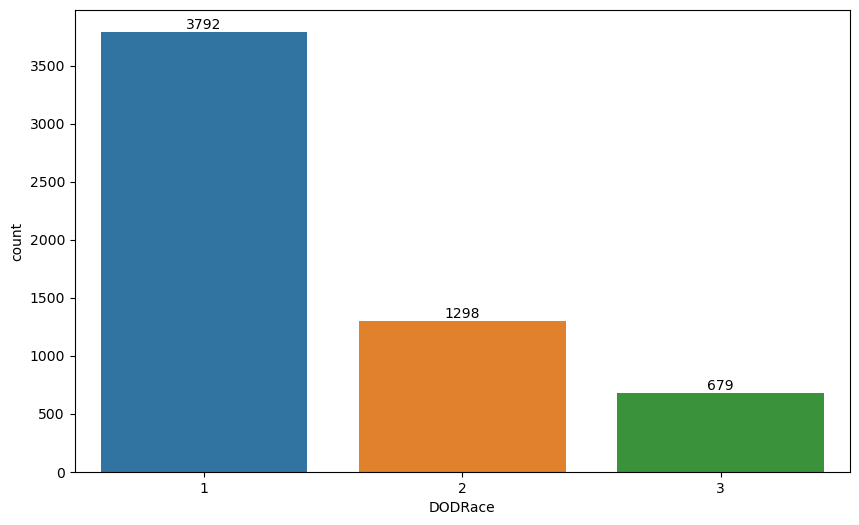

In [134]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

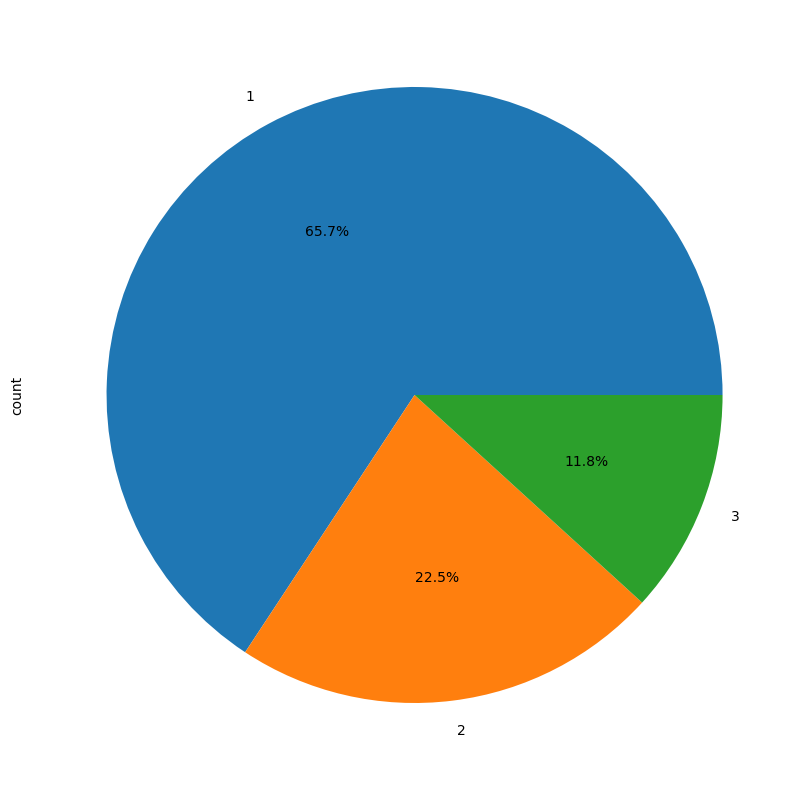

In [135]:
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [136]:
import pandas as pd

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

outlier_data = []

for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    column_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    outlier_count = column_outliers.sum()
    outlier_data.append({'Column': column, 'Outlier Count': outlier_count})

outlier_counts = pd.DataFrame(outlier_data)
outlier_counts


Column  Outlier Count
0   abdominalextensiondepthsitting              6
1                   acromialheight              1
2            acromionradialelength              4
3               anklecircumference              4
4                     axillaheight              1
5          balloffootcircumference              2
6                 balloffootlength              2
7                biacromialbreadth              1
8        bicepscircumferenceflexed              0
9                 bicristalbreadth             11
10                bideltoidbreadth              0
11              bimalleolarbreadth              0
12                bitragionchinarc              2
13       bitragionsubmandibulararc              1
14              bizygomaticbreadth              0
15            buttockcircumference              8
16                    buttockdepth              2
17                   buttockheight              5
18               buttockkneelength              2
19          buttockpopliteallength              1
20               calfcircumference              7
21                 cervicaleheight              0
22                    chestbreadth              4
23              chestcircumference              1
24                      chestdepth              2
25                     chestheight              0
26                    crotchheight              4
27           crotchlengthomphalion              4
28  crotchlengthposterioromphalion              3
29                      earbreadth              0
30                       earlength              0
31                   earprotrusion              9
32                 elbowrestheight              3
33                eyeheightsitting              0
34           footbreadthhorizontal              1
35                      footlength              0
36       forearmcenterofgriplength              2
37      forearmcircumferenceflexed              0
38           forearmforearmbreadth              0
39               forearmhandlength              2
40             functionalleglength              1
41                     handbreadth              0
42               handcircumference              0
43                      handlength              5
44                     headbreadth              9
45               headcircumference              4
46                      headlength              2
47          heelanklecircumference              1
48                     heelbreadth              5
49                      hipbreadth             16
50               hipbreadthsitting              8
51              iliocristaleheight              2
52           interpupillarybreadth              7
53                      interscyei              0
54                     interscyeii              0
55            kneeheightmidpatella              2
56               kneeheightsitting              2
57  lateralfemoralepicondyleheight              7
58          lateralmalleolusheight              1
59         lowerthighcircumference              8
60             mentonsellionlength              2
61               neckcircumference              0
62           neckcircumferencebase              0
63   overheadfingertipreachsitting              0
64                      palmlength              0
65                 poplitealheight              2
66            radialestylionlength              2
67           shouldercircumference              0
68             shoulderelbowlength              1
69                  shoulderlength              0
70                   sittingheight              0
71          sleevelengthspinewrist              2
72                   sleeveoutseam              1
73                            span              1
74                         stature              0
75             suprasternaleheight              0
76                  tenthribheight              1
77              thighcircumference             10
78                  thighclearance              9
79                   thumbti

In [137]:
outlier_counts.sum()

Column           abdominalextensiondepthsittingacromialheightac...
Outlier Count                                                  663
dtype: object

In [138]:
df['SubjectsBirthLocation'].nunique()

2

In [139]:
import pandas as pd

unique_classes = df['DODRace'].unique()
outlier_data = []

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

for class_label in unique_classes:
    # Filter for class name
    class_data = df[df['DODRace'] == class_label]

    # Calculate outlier counts for each column within this class
    for column in class_data.columns:
        lower_bound = Q1[column] - 1.5 * IQR[column]
        upper_bound = Q3[column] + 1.5 * IQR[column]
        column_outliers = ((class_data[column] < lower_bound) | (class_data[column] > upper_bound))
        outlier_count = column_outliers.sum()

        # Store the outlier count
        outlier_data.append({
            'Class': class_label,
            'Column': column,
            'Outlier Count': outlier_count
        })

outlier_counts_by_class = pd.DataFrame(outlier_data)

total_outliers = outlier_counts_by_class['Outlier Count'].sum()
outlier_counts_by_class.groupby('Column')['Outlier Count'].sum().sum()


3034

In [140]:
outlier_counts_by_class

Class                          Column  Outlier Count
0        2  abdominalextensiondepthsitting              8
1        2                  acromialheight              0
2        2           acromionradialelength              7
3        2              anklecircumference             12
4        2                    axillaheight              6
5        2         balloffootcircumference              7
6        2                balloffootlength              3
7        2               biacromialbreadth              0
8        2       bicepscircumferenceflexed              7
9        2                bicristalbreadth             23
10       2                bideltoidbreadth              2
11       2              bimalleolarbreadth              2
12       2                bitragionchinarc             12
13       2       bitragionsubmandibulararc              1
14       2              bizygomaticbreadth              1
15       2            buttockcircumference             19
16       2                    buttockdepth             13
17       2                   buttockheight             17
18       2               buttockkneelength             13
19       2          buttockpopliteallength             16
20       2               calfcircumference             10
21       2                 cervicaleheight              2
22       2                    chestbreadth              4
23       2              chestcircumference              1
24       2                      chestdepth              6
25       2                     chestheight              2
26       2                    crotchheight              8
27       2           crotchlengthomphalion             10
28       2  crotchlengthposterioromphalion              3
29       2                      earbreadth             15
30       2                       earlength              6
31       2                   earprotrusion              2
32       2                 elbowrestheight             18
33       2                eyeheightsitting              7
34       2           footbreadthhorizontal              6
35       2                      footlength              2
36       2       forearmcenterofgriplength              7
37       2      forearmcircumferenceflexed              1
38       2           forearmforearmbreadth              0
39       2               forearmhandlength             13
40       2             functionalleglength              6
41       2                     handbreadth              0
42       2               handcircumference              0
43       2                      handlength             24
44       2                     headbreadth             16
45       2               headcircumference             15
46       2                      headlength              5
47       2          heelanklecircumference              2
48       2                     heelbreadth             28
49       2                      hipbreadth             25
50       2               hipbreadthsitting             26
51       2              iliocristaleheight             12
52       2           interpupillarybreadth             43
53       2                      interscyei              0
54       2                     interscyeii              1
55       2            kneeheightmidpatella             11
56       2               kneeheightsitting              7
57       2  lateralfemoralepicondyleheight             13
58       2          lateralmalleolusheight              3
59       2         lowerthighcircumference             28
60       2             mentonsellionlength              6
61       2               neckcircumference              0
62       2           neckcircumferencebase              0
63       2   overheadfingertipreachsitting              4
64       2                      palmlength             13
65       2                 poplitealheight              5
66       2            radialestylionlength             12
67       2           shouldercircumference              0
68 

In [141]:
outlier_counts_by_class.groupby('Class')['Outlier Count'].sum()

Class
1    1654
2     943
3     437
Name: Outlier Count, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [142]:
#Columns who got droped : Age, Date, subjectid, SubjectId ,WritingPreference, Weightlbs, Branch, Component, Installation, SubjectNumericRace, PrimaryMOS, Heightin
df.select_dtypes(include='object').sum()

Series([], dtype: float64)

In [143]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [144]:
target = 'DODRace'
X =df.drop('DODRace',axis=1)
y = df[target]
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (5769, 95)
Shape of Y is  : (5769,)
Shape of df is : (5769, 96)


In [145]:
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state=13,stratify =y) 

In [146]:
X_test.shape

(1154, 95)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [147]:
Logistic_Model = LogisticRegression()
Standard_Scaler = StandardScaler()

In [148]:
Logistick_pip = Pipeline([('scaler',StandardScaler()),('Logistic_Model',LogisticRegression())])
Logistick_pip.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic_Model', LogisticRegression())])

In [149]:
Logistick_pip.named_steps['Logistic_Model'].coef_

array([[ 0.15880887,  0.54584326,  0.0210377 ,  0.56435437, -0.33682062,
         0.15172126, -0.09208479,  0.16958411, -0.26706123,  0.30001105,
        -0.55916652, -0.07824613, -0.70723642,  0.18955866, -0.04655495,
         0.05787898, -0.29482586, -0.26131767, -0.07899583, -0.26157892,
         0.2752789 ,  0.07478332,  0.25147534,  0.0912656 ,  0.42479519,
         0.728161  , -0.2615082 ,  0.05863552, -0.00569401, -0.01565022,
        -0.01657714,  0.07288721, -0.25801745, -0.08549734, -0.28805881,
        -0.07977687,  0.11188929, -0.05798578,  0.40729291,  0.16889442,
        -0.09109067,  0.21261179,  0.27534957, -0.15768687,  0.1674347 ,
        -0.42028045,  0.46027403, -0.4830229 , -0.55824742,  0.09147955,
         0.42731328,  0.46426994, -0.31398794, -0.00878395,  0.21565826,
        -0.26269833,  0.34522718, -0.05298273,  0.22514365, -0.21159057,
        -0.2100112 ,  0.34303666, -0.29299314, -0.03671516, -0.30095761,
        -0.15420822, -0.74394852, -0.60078928,  0.6

In [150]:
y_pred =Logistick_pip.predict(X_test)
y_train_pred = Logistick_pip.predict(X_train)


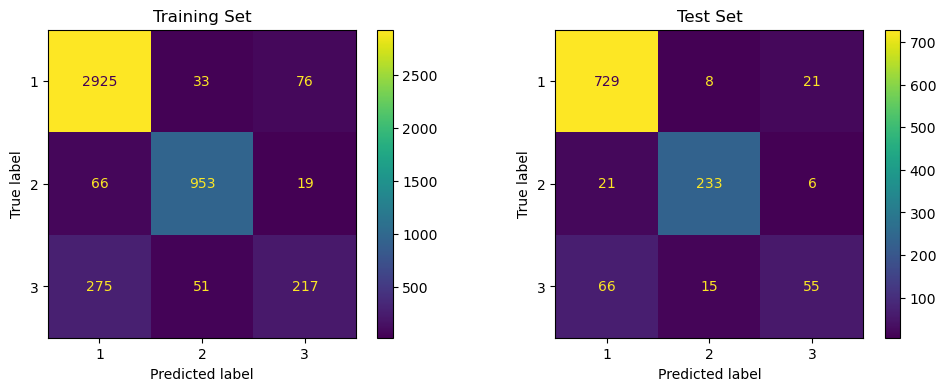


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3034
           2       0.92      0.92      0.92      1038
           3       0.70      0.40      0.51       543

    accuracy                           0.89      4615
   macro avg       0.84      0.76      0.78      4615
weighted avg       0.88      0.89      0.88      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.89      0.96      0.93       758
           2       0.91      0.90      0.90       260
           3       0.67      0.40      0.50       136

    accuracy                           0.88      1154
   macro avg       0.82      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154



In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(Logistick_pip, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(Logistick_pip, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}''')

In [152]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score,  f1_score


f1_S = make_scorer(f1_score, average = "weighted")
precision_S = make_scorer(precision_score, average = "weighted")
recall_S = make_scorer(recall_score, average = "weighted")


scoring = {"f1r":f1_S,
           "precision":precision_S,
           "recall":recall_S} # this will work for all the models when we evalute the algorithms and so on 

In [153]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()

fit_time           0.158734
score_time         0.003994
test_f1r           0.860637
train_f1r          0.877698
test_precision     0.860160
train_precision    0.878304
test_recall        0.872801
train_recall       0.888118
dtype: float64

In [154]:
df_scores

fit_time  score_time  test_f1r  train_f1r  test_precision  \
1   0.140626    0.003924  0.839808   0.882047        0.835753   
2   0.140464    0.003900  0.873710   0.876209        0.874986   
3   0.134796    0.003865  0.876656   0.874442        0.880141   
4   0.133833    0.003885  0.851929   0.879812        0.850820   
5   0.130563    0.003859  0.888627   0.873524        0.887587   
6   0.132789    0.004172  0.852196   0.876661        0.849955   
7   0.202206    0.004639  0.862681   0.876537        0.863706   
8   0.293268    0.003968  0.855786   0.880666        0.857243   
9   0.142089    0.003860  0.839028   0.881071        0.835641   
10  0.136709    0.003868  0.865953   0.876016        0.865771   

    train_precision  test_recall  train_recall  
1          0.882892     0.854978      0.891645  
2          0.876580     0.880952      0.887070  
3          0.874437     0.887446      0.885143  
4          0.880585     0.870130      0.889959  
5          0.874324     0.896104      0.884902  
6          0.877909     0.865510      0.887578  
7          0.877029     0.878525      0.886856  
8          0.881106     0.872017      0.890226  
9          0.881946     0.845987      0.891189  
10         0.876235     0.876356      0.886615

In [155]:
(df_scores['train_f1r']/df_scores['test_f1r']) -1 

1     0.050297
2     0.002861
3    -0.002526
4     0.032729
5    -0.016996
6     0.028708
7     0.016062
8     0.029073
9     0.050109
10    0.011620
dtype: float64

# Conclution

### Logistic Model GridsearchCV

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
operations = [("scaler", StandardScaler()), ("logistic_model", LogisticRegression(max_iter=5000))]
GridModel = Pipeline(steps=operations)
GridModel.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'logistic_model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logistic_model__C', 'logistic_model__class_weight', 'logistic_model__dual', 'logistic_model__fit_intercept', 'logistic_model__intercept_scaling', 'logistic_model__l1_ratio', 'logistic_model__max_iter', 'logistic_model__multi_class', 'logistic_model__n_jobs', 'logistic_model__penalty', 'logistic_model__random_state', 'logistic_model__solver', 'logistic_model__tol', 'logistic_model__verbose', 'logistic_model__warm_start'])

    'memory': This key may be used to specify the memory cache for the model or pipeline.

    'steps': It might indicate the different processing steps or components in a machine learning pipeline.

    'verbose': This key typically controls the level of verbosity or detail of output messages during model training and evaluation.

    'scaler': This could be a preprocessing step that scales or normalizes the input data to the model.

    'logistic_model': This likely refers to the logistic regression model itself, which is a common classification algorithm.

    'scaler__copy': It may specify whether to create a copy of the scaler or modify it in place.

    'scaler__with_mean': A boolean flag that indicates whether to center the data during scaling.

    'scaler__with_std': A boolean flag that indicates whether to scale the data to unit variance during scaling.

    'logistic_model__C': This parameter typically represents the regularization strength in logistic regression.

    'logistic_model__class_weight': It may be used to specify class weights for handling imbalanced datasets.

    'logistic_model__dual': A boolean flag that specifies whether to solve the dual or primal optimization problem.

    'logistic_model__fit_intercept': A boolean flag that indicates whether to fit an intercept term in the logistic regression model.

    'logistic_model__intercept_scaling': This parameter may scale the intercept term if 'fit_intercept' is set to True.

    'logistic_model__l1_ratio': This parameter controls the L1 regularization strength in elastic net regularization.

    'logistic_model__max_iter': It specifies the maximum number of iterations for the logistic regression solver.

    'logistic_model__multi_class': This parameter determines how the logistic regression model handles multiclass problems (e.g., 'ovr' for one-vs-rest or 'multinomial' for softmax regression).

    'logistic_model__n_jobs': The number of CPU cores to use for parallel processing, if supported.

    'logistic_model__penalty': This parameter specifies the type of regularization ('l1' or 'l2') in logistic regression.

    'logistic_model__random_state': A seed for the random number generator to ensure reproducibility.

    'logistic_model__solver': It specifies the algorithm used to solve the logistic regression optimization problem (e.g., 'liblinear', 'lbfgs', 'sag').

    'logistic_model__tol': The tolerance for stopping criteria during the optimization process.

    'logistic_model__verbose': This controls the verbosity of the logistic regression solver.

    'logistic_model__warm_start': A boolean flag that indicates whether to reuse the solution from the previous call to fit as initialization.

In [158]:
param_grid = { "logistic_model__class_weight" : ["balanced", None],
               'logistic_model__penalty': ["l1","l2"],
               'logistic_model__solver' : ['saga','lbfgs','liblinear'],
               'logistic_model__C' :[0.001,0.01, 0.1, 1, 5, 10, 15, 20, 25]
             }
f1_Hispanic =  make_scorer(f1_score, average=None, labels=[3])# Class 3 represent the Hispanic which is the worst scoring for our model and we need to foucs on it 
# Average can be (weighted, macro) if wanna foucse on one of these and so on 


In [159]:
grid_Logistick_pipe = GridSearchCV(GridModel, param_grid = param_grid,scoring=f1_Hispanic, cv=5, return_train_score=True,n_jobs=-1)


In [160]:
grid_Logistick_pipe.fit(X_train,y_train) # ~ 12 min 

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_model',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'logistic_model__C': [0.001, 0.01, 0.1, 1, 5, 10, 15,
                                               20, 25],
                         'logistic_model__class_weight': ['balanced', None],
                         'logistic_model__penalty': ['l1', 'l2'],
                         'logistic_model__solver': ['saga', 'lbfgs',
                                                    'liblinear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [161]:
grid_Logistick_pipe.best_params_

{'logistic_model__C': 0.1,
 'logistic_model__class_weight': 'balanced',
 'logistic_model__penalty': 'l2',
 'logistic_model__solver': 'liblinear'}

##### Best parameters are : 
        {'logistic_model__C': 0.01,
         'logistic_model__class_weight': 'balanced',
         'logistic_model__penalty': 'l2',
         'logistic_model__solver': 'saga'}


         New one or better one 
         {'logistic_model__C': 0.1,
        'logistic_model__class_weight': 'balanced',
        'logistic_model__penalty': 'l2',
        'logistic_model__solver': 'liblinear'}

In [162]:
y_pred_grid =grid_Logistick_pipe.predict(X_test)
y_train_pred_grid = grid_Logistick_pipe.predict(X_train)

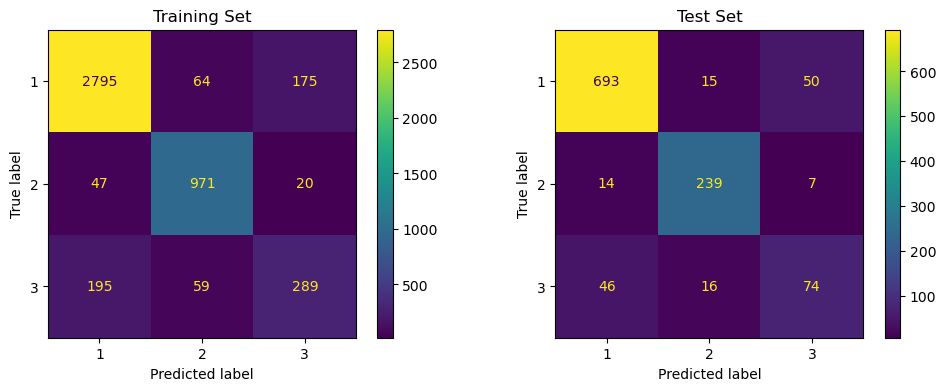


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3034
           2       0.89      0.94      0.91      1038
           3       0.60      0.53      0.56       543

    accuracy                           0.88      4615
   macro avg       0.80      0.80      0.80      4615
weighted avg       0.87      0.88      0.88      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.92      0.91      0.92       758
           2       0.89      0.92      0.90       260
           3       0.56      0.54      0.55       136

    accuracy                           0.87      1154
   macro avg       0.79      0.79      0.79      1154
weighted avg       0.87      0.87      0.87      1154



In [163]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(grid_Logistick_pipe, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(grid_Logistick_pipe, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_grid)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_grid)}''')


-----------------------------Train Results-----------------------------

              precision    recall  f1-score   support

           1       0.95      0.81      0.87      2942
           2       0.88      0.90      0.89      1002
           3       0.41      0.72      0.52       527

    accuracy                           0.82      4471
   macro avg       0.75      0.81      0.76      4471
weighted avg       0.87      0.82      0.84      4471

                        
-----------------------------Test Results-----------------------------

              precision    recall  f1-score   support

           1       0.94      0.80      0.86       727
           2       0.89      0.90      0.89       259
           3       0.38      0.67      0.49       132

    accuracy                           0.81      1118

   macro avg       0.73      0.79      0.75      1118
   
weighted avg       0.86      0.81      0.83      1118

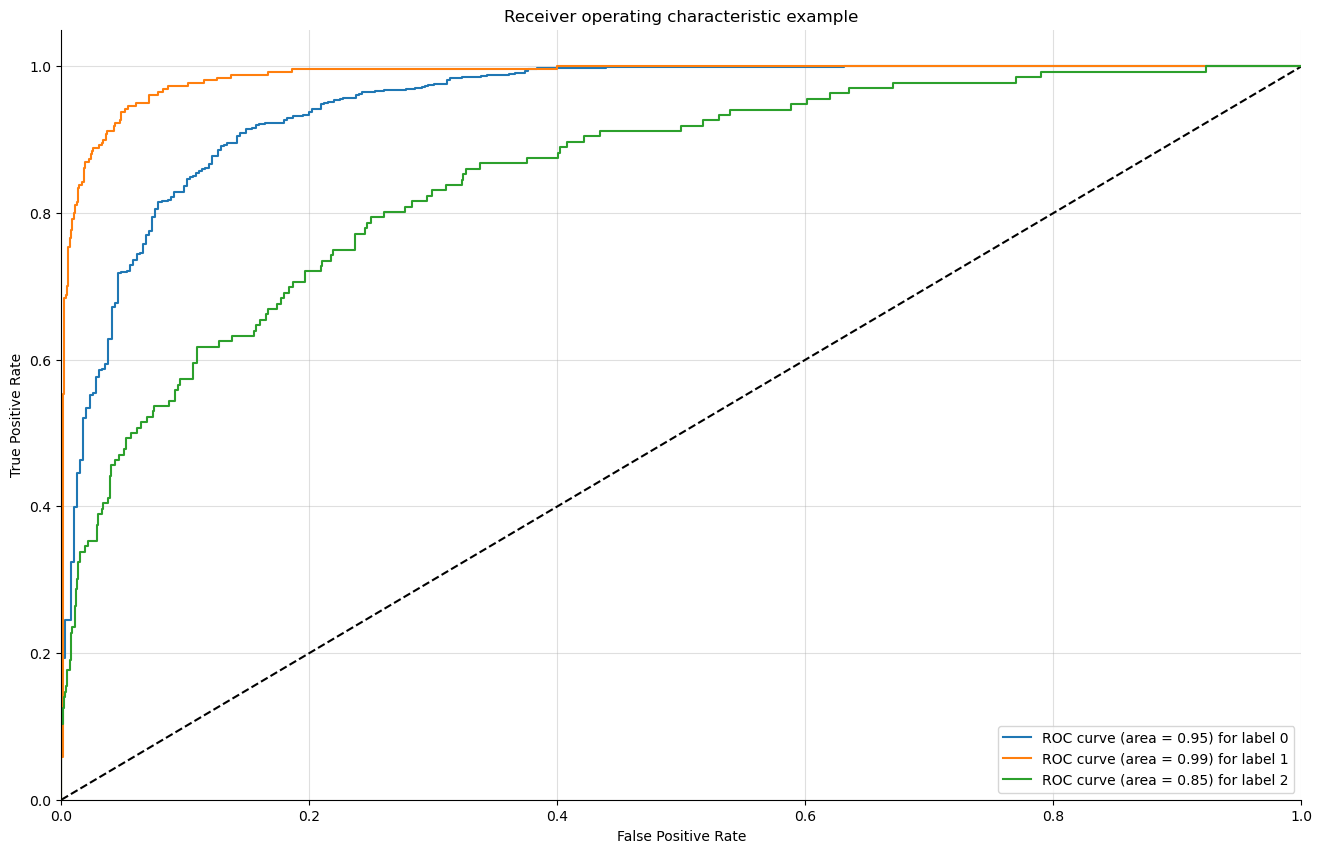

In [164]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
plot_multiclass_roc(grid_Logistick_pipe, X_test, y_test, n_classes=3, figsize=(16, 10));

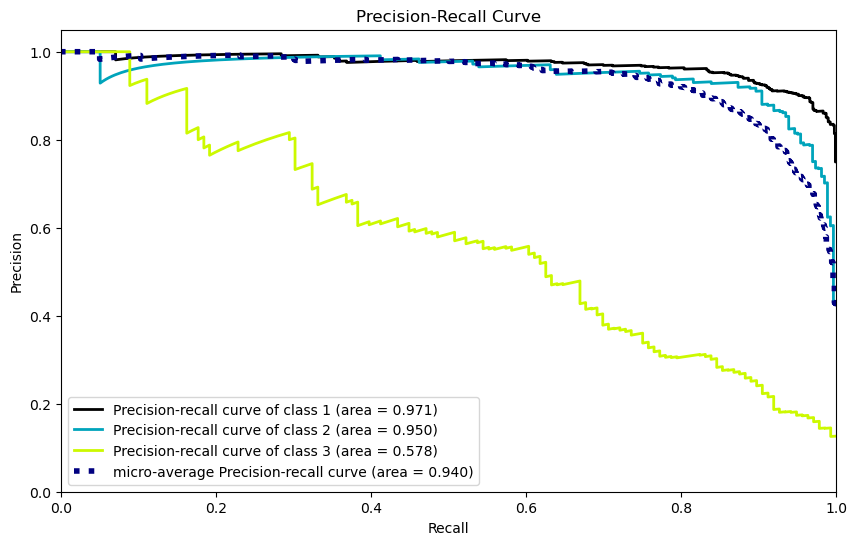

In [263]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = grid_Logistick_pipe.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [165]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [166]:
operations_SVM = [("scaler", StandardScaler()), ("SVC", SVC(class_weight="balanced",probability=True))]
SVM_pipe = Pipeline(steps=operations_SVM)

In [167]:
SVM_pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(class_weight='balanced', probability=True))])

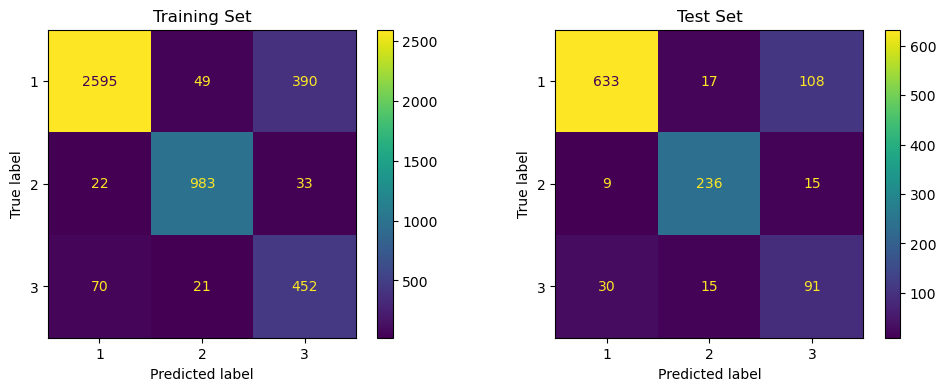


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3034
           2       0.93      0.95      0.94      1038
           3       0.52      0.83      0.64       543

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.87      0.88      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.94      0.84      0.89       758
           2       0.88      0.91      0.89       260
           3       0.43      0.67      0.52       136

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.77      1154
weighted avg       0.87      0.83      0.84      1154



In [168]:
y_pred_svm = SVM_pipe.predict(X_test)
y_train_pred_SVM = SVM_pipe.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(SVM_pipe, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(SVM_pipe, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_SVM)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_svm)}''')

In [169]:
scores = cross_validate(SVM_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1r           0.831930
train_f1r          0.886294
test_precision     0.854282
train_precision    0.907899
test_recall        0.818852
train_recall       0.877194
dtype: float64

In [170]:
df_scores

fit_time  score_time  test_f1r  train_f1r  test_precision  train_precision  \
1  5.671732    0.438391  0.824662   0.883779        0.845837         0.906867   
2  5.278910    0.420880  0.829944   0.887058        0.855747         0.909264   
3  5.239702    0.433032  0.834534   0.888810        0.856260         0.908980   
4  5.094691    0.412708  0.843166   0.883146        0.860513         0.903408   
5  5.460281    0.430075  0.827344   0.888675        0.853054         0.910974   

   test_recall  train_recall  
1     0.812568      0.874052  
2     0.814735      0.877844  
3     0.822319      0.880282  
4     0.832069      0.874323  
5     0.812568      0.879469

In [171]:
(df_scores['train_f1r'] / df_scores['test_f1r'])-1

1    0.071686
2    0.068817
3    0.065037
4    0.047416
5    0.074129
dtype: float64

###  SVC Model GridsearchCV

In [172]:
SVM_pipe_grid = Pipeline(steps=operations_SVM)

In [173]:
SVM_pipe_grid.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'SVC', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'SVC__C', 'SVC__break_ties', 'SVC__cache_size', 'SVC__class_weight', 'SVC__coef0', 'SVC__decision_function_shape', 'SVC__degree', 'SVC__gamma', 'SVC__kernel', 'SVC__max_iter', 'SVC__probability', 'SVC__random_state', 'SVC__shrinking', 'SVC__tol', 'SVC__verbose'])

    'scaler__copy': It may specify whether to create a copy of the scaler or modify it in place.

    'scaler__with_mean': A boolean flag that indicates whether to center the data during scaling.

    'scaler__with_std': A boolean flag that indicates whether to scale the data to unit variance during scaling.

    'SVC__C': This parameter typically represents the regularization parameter in the SVM, controlling the trade-off between maximizing the margin and minimizing the classification error.

    'SVC__break_ties': A boolean flag that specifies whether to break ties in predicted class values.

    'SVC__cache_size': This parameter specifies the size of the kernel cache.

    'SVC__class_weight': It may be used to specify class weights for handling imbalanced datasets.

    'SVC__coef0': This parameter controls the independent term in the kernel function.

    'SVC__decision_function_shape': This parameter determines the shape of the decision function for multi-class problems.

    'SVC__degree': The degree of the polynomial kernel function.

    'SVC__gamma': This parameter controls the shape of the radial basis function (RBF) kernel.

    'SVC__kernel': Specifies the type of kernel to be used (e.g., 'linear', 'poly', 'rbf', 'sigmoid').

    'SVC__max_iter': It specifies the maximum number of iterations for the SVM solver.

    'SVC__probability': A boolean flag that indicates whether to enable probability estimates.

    'SVC__random_state': A seed for the random number generator to ensure reproducibility.

    'SVC__shrinking': A boolean flag that specifies whether to use the shrinking heuristic during training.

    'SVC__tol': The tolerance for stopping criteria during the optimization process.

    'SVC__verbose': This controls the verbosity of the SVM solver.

In [174]:
param_grid = {'SVC__C': [0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.01, 0.1],
              'SVC__kernel': ['rbf', 'linear','poly'],
              'SVC__decision_function_shape' : ['ovr','ovo'],
              'SVC__class_weight': ["balanced", None]}

In [175]:
svm_model_grid = GridSearchCV(SVM_pipe_grid, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [176]:
svm_model_grid.fit(X_train, y_train) # ~ 30 min 

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.480 total time=   6.6s
[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.475 total time=   6.7s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.471 total time=   6.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.461 total time=   6.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.483 total time=   6.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.199 total time=  16.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.285 total time=  27.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.291 total time=  28.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.300 total time=  28.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.312 total time=  28.5s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.302 total time=  28.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.193 total time=  18.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.268 total time=  18.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.475 total time=   8.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.246 total time=  18.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.254 total time=  18.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.480 total time=   7.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.471 total time=   8.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.483 total time=   7.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.461 total time=   7.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.302 total time=  30.4s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.291 total time=  30.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.285 total time=  31.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.300 total time=  32.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.312 total time=  31.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.199 total time=  19.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.193 total time=  19.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.268 total time=  19.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.246 total time=  19.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.254 total time=  20.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.475 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.480 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.471 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.483 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.297 total time=  34.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.301 total time=  35.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.461 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.290 total time=  34.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.292 total time=  36.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.309 total time=  36.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.195 total time=  23.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.205 total time=  24.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.252 total time=  24.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.234 total time=  24.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.250 total time=  24.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.475 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.480 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.471 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  38.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.483 total time=  10.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.461 total time=   9.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.447 total time=  13.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  38.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  35.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.398 total time=  12.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  37.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.416 total time=  12.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.396 total time=  12.7s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  35.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.380 total time=  11.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.475 total time=   8.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.480 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.471 total time=   8.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.483 total time=   7.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.461 total time=   7.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.300 total time=  31.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.302 total time=  30.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.285 total time=  29.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.291 total time=  30.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.199 total time=  16.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.312 total time=  30.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.193 total time=  16.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.268 total time=  17.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.246 total time=  22.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.475 total time=  12.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.254 total time=  23.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.480 total time=  12.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.471 total time=  12.6s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.483 total time=  11.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.300 total time=  41.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.302 total time=  41.9s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.461 total time=  10.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.291 total time=  42.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.285 total time=  44.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.312 total time=  46.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.193 total time=  27.7s
[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.199 total time=  28.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.268 total time=  27.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.254 total time=  27.4s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.246 total time=  27.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.475 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.480 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.471 total time=  10.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.301 total time=  45.2s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.297 total time=  43.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.483 total time=  14.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.461 total time=  14.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.290 total time=  44.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.309 total time=  45.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.292 total time=  46.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.195 total time=  31.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.205 total time=  28.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.252 total time=  28.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.234 total time=  28.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.250 total time=  26.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.475 total time=  12.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.480 total time=  13.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.471 total time=  15.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  48.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.483 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.461 total time=  14.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.447 total time=  15.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  46.5s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  47.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.398 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.416 total time=  12.6s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  45.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.396 total time=  12.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  43.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.380 total time=  10.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.241 total time=   4.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.189 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.236 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  15.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.211 total time=   5.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.248 total time=   5.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.1s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  11.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  11.5s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  11.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  11.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.241 total time=   5.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.189 total time=   5.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.236 total time=   5.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  17.9s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  17.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.211 total time=   5.0s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.248 total time=   4.9s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  18.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  16.5s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  16.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.4s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.241 total time=   5.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.189 total time=   5.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.236 total time=   6.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  18.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  18.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  18.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.211 total time=   7.8s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.248 total time=   7.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  20.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=  15.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=  14.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=  14.1s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=  14.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.241 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.189 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.236 total time=   5.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.248 total time=   4.7s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.211 total time=   5.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.296 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  31.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.344 total time=   9.2s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.297 total time=   9.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  30.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  29.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  28.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.311 total time=   9.3s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  28.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.312 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.241 total time=   5.4s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.189 total time=   5.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.236 total time=   5.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  15.6s
[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  15.6s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.248 total time=   5.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.211 total time=   6.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  16.0s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  15.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  10.1s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  10.2s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  10.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.000 total time=  10.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.189 total time=   6.0s
[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.241 total time=   6.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.236 total time=   6.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  16.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  16.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.248 total time=   4.7s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  16.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.211 total time=   5.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  17.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  17.3s
[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.8s
[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.000 total time=  10.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.241 total time=   4.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.189 total time=   5.1s
[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.236 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  16.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  15.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.211 total time=   5.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.248 total time=   5.1s
[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  14.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=   9.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=   9.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=   9.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=   9.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.000 total time=   9.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.241 total time=   4.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.189 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.236 total time=   4.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.211 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.248 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.296 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.344 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.297 total time=   8.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  26.2s
[CV 2/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  26.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  26.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  26.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  26.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.311 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.01, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.312 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.464 total time=   7.3s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.469 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.480 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.451 total time=   6.4s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.475 total time=   6.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.401 total time=  21.2s
[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.417 total time=  21.5s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.363 total time=  21.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.410 total time=  20.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.374 total time=  20.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.335 total time=  14.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.362 total time=  14.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.360 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.329 total time=  14.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.342 total time=  15.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.464 total time=   6.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.417 total time=  21.4s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.469 total time=   6.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.480 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.401 total time=  21.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.363 total time=  22.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.475 total time=   8.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.451 total time=   7.8s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.410 total time=  22.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.374 total time=  22.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.335 total time=  16.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.362 total time=  16.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.360 total time=  16.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.342 total time=  15.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.329 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.464 total time=   7.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.469 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.480 total time=   7.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.411 total time=  22.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.401 total time=  22.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.475 total time=   7.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.451 total time=   6.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.364 total time=  22.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.377 total time=  21.1s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.410 total time=  21.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.361 total time=  14.6s
[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.333 total time=  15.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.335 total time=  15.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.330 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.338 total time=  15.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.464 total time=   7.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.469 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.480 total time=   8.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.475 total time=   7.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.451 total time=   7.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  32.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  32.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  32.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.347 total time=  14.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.352 total time=  14.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.335 total time=  14.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  33.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  33.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.382 total time=  14.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.369 total time=  13.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.464 total time=   7.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.469 total time=   6.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.480 total time=   8.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.475 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.417 total time=  23.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.451 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.401 total time=  24.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.363 total time=  23.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.410 total time=  24.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.374 total time=  24.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.335 total time=  15.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.362 total time=  15.4s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.360 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.342 total time=  15.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.329 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.464 total time=   7.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.469 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.480 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.417 total time=  23.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.401 total time=  23.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.363 total time=  23.4s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.475 total time=   8.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.451 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.410 total time=  25.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.374 total time=  25.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.335 total time=  18.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.362 total time=  16.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.360 total time=  17.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.329 total time=  17.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.342 total time=  18.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.464 total time=   6.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.469 total time=   6.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.480 total time=   6.6s
[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.411 total time=  22.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.401 total time=  21.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.475 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.451 total time=   6.7s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.364 total time=  21.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.410 total time=  20.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.377 total time=  20.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.333 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.361 total time=  15.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.335 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.330 total time=  15.0s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.338 total time=  14.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.464 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.469 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.480 total time=   9.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.475 total time=   9.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.451 total time=   9.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  34.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.347 total time=  16.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  36.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  36.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  36.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.352 total time=  15.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  36.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.335 total time=  15.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.382 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.443 total time=   4.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=balanced, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.369 total time=  12.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.413 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  13.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.439 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.368 total time=   5.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=linear;, score=0.391 total time=   5.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  14.0s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  14.7s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  14.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.070 total time=   9.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.052 total time=  10.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.018 total time=  11.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.071 total time=  11.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=scale, SVC__kernel=poly;, score=0.085 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.443 total time=   7.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.413 total time=   7.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.439 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  19.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  20.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  20.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.368 total time=   9.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=linear;, score=0.391 total time=   9.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  22.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  22.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.070 total time=  17.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.052 total time=  16.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.018 total time=  17.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.071 total time=  17.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=auto, SVC__kernel=poly;, score=0.085 total time=  16.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.443 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.413 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.439 total time=   8.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  25.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  25.7s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  25.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.368 total time=   8.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=linear;, score=0.391 total time=   8.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  23.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  23.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.070 total time=  14.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.052 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.054 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.018 total time=  15.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.01, SVC__kernel=poly;, score=0.053 total time=  15.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.443 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.413 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.439 total time=   9.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.368 total time=   9.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=linear;, score=0.391 total time=   9.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.370 total time=  18.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.359 total time=  15.8s
[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  47.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.347 total time=  15.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  44.3s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  45.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  42.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  42.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.355 total time=  18.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.443 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovr, SVC__gamma=0.1, SVC__kernel=poly;, score=0.360 total time=  18.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  22.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.413 total time=   8.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  23.0s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  22.4s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  22.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.439 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.368 total time=   9.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=rbf;, score=0.000 total time=  23.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=linear;, score=0.391 total time=   8.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.070 total time=  16.4s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.085 total time=  15.8s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.052 total time=  16.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.018 total time=  16.5s
[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=scale, SVC__kernel=poly;, score=0.071 total time=  16.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.413 total time=   7.4s
[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.443 total time=   7.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.439 total time=   7.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  22.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  22.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  22.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.368 total time=   7.1s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=linear;, score=0.391 total time=   7.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.070 total time=  12.2s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  20.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=rbf;, score=0.000 total time=  20.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.052 total time=  12.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.018 total time=  12.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.071 total time=  11.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=auto, SVC__kernel=poly;, score=0.085 total time=  11.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.443 total time=   6.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.413 total time=   7.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.439 total time=   7.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.368 total time=   7.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.0s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.6s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=linear;, score=0.391 total time=   6.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=rbf;, score=0.000 total time=  19.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.070 total time=  12.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.052 total time=  13.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.018 total time=  13.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.054 total time=  13.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.01, SVC__kernel=poly;, score=0.053 total time=  13.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.443 total time=   7.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.413 total time=   7.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.439 total time=   7.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.368 total time=   7.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=linear;, score=0.391 total time=   8.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.370 total time=  19.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  43.8s
[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  43.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.359 total time=  19.0s
[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  43.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.347 total time=  18.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  41.6s
[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=rbf;, score=0.000 total time=  40.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.355 total time=  11.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END SVC__C=0.1, SVC__class_weight=None, SVC__decision_function_shape=ovo, SVC__gamma=0.1, SVC__kernel=poly;, score=0.360 total time=   8.8s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__decision_function_shape': ['ovr', 'ovo'],
                         'SVC__gamma': ['scale', 'auto', 0.01, 0.1],
                         'SVC__kernel': ['rbf', 'linear', 'poly']},
             scoring=make_scorer(f1_score, average=None, labels=[3]),
             verbose=3)

In [177]:
svm_model_grid.best_params_

{'SVC__C': 0.01,
 'SVC__class_weight': 'balanced',
 'SVC__decision_function_shape': 'ovr',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}


    {'SVC__C': 0.01,
    'SVC__class_weight': 'balanced',
    'SVC__decision_function_shape': 'ovr',
    'SVC__gamma': 'scale',
    'SVC__kernel': 'linear'}

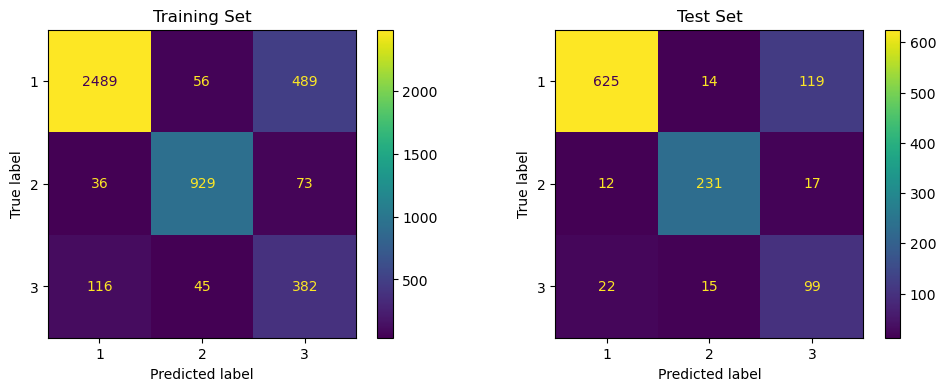


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.94      0.82      0.88      3034
           2       0.90      0.89      0.90      1038
           3       0.40      0.70      0.51       543

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.95      0.82      0.88       758
           2       0.89      0.89      0.89       260
           3       0.42      0.73      0.53       136

    accuracy                           0.83      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.87      0.83      0.84      1154



In [178]:
y_pred_svm_grid = svm_model_grid.predict(X_test)
y_train_pred_SVM_grid = svm_model_grid.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_SVM_grid)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_svm_grid)}''')

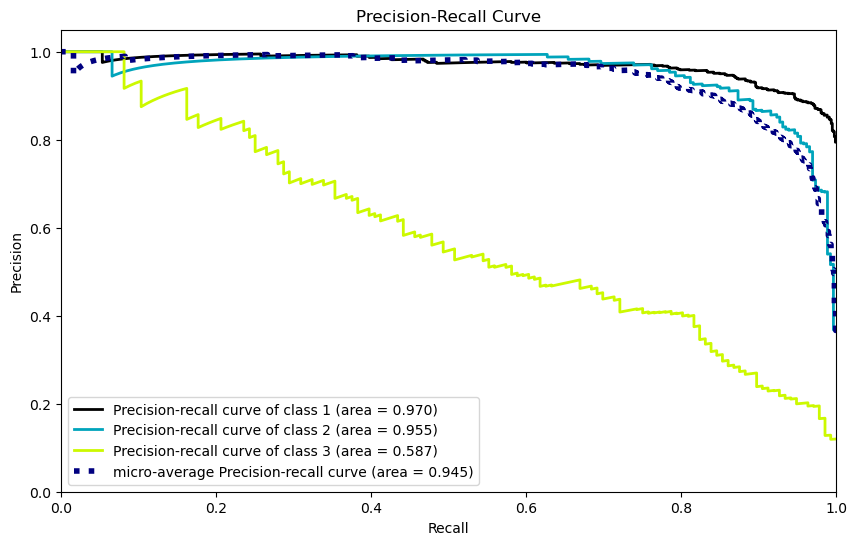

In [264]:
y_pred_proba = svm_model_grid.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 3. RF

### Vanilla RF Model

In [179]:
from sklearn.ensemble import RandomForestClassifier

Random Forest (RF):
Random Forest is an ensemble of Decision Trees. Like individual Decision Trees, Random Forests are not sensitive to feature scaling, and scaling is usually not required.

In [180]:
RF_model = RandomForestClassifier() 

In [181]:
RF_model.fit(X_train,y_train)

RandomForestClassifier()

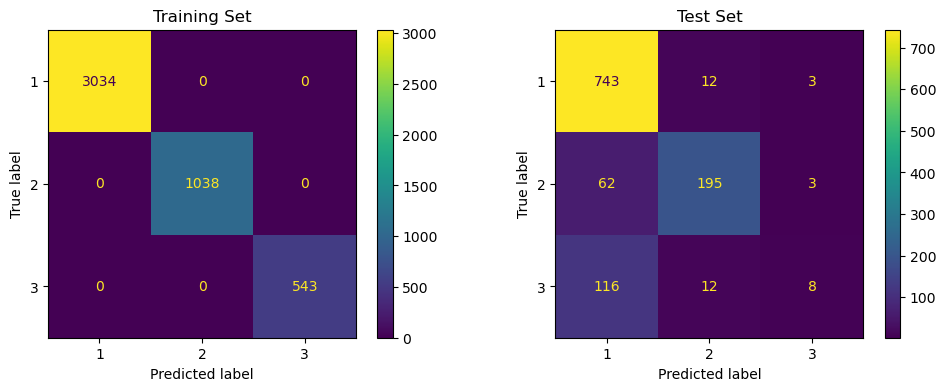


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.81      0.98      0.89       758
           2       0.89      0.75      0.81       260
           3       0.57      0.06      0.11       136

    accuracy                           0.82      1154
   macro avg       0.76      0.60      0.60      1154
weighted avg       0.80      0.82      0.78      1154



In [182]:
y_pred_RF = RF_model.predict(X_test)
y_train_pred_RF = RF_model.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(RF_model, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_RF)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_RF)}''')

### RF Model GridsearchCV

In [183]:
RF_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

    'bootstrap': A boolean flag that indicates whether bootstrap samples are used when building trees. Bootstrap sampling is a common technique in Random Forest to introduce randomness.

    'ccp_alpha': This parameter controls the complexity of the trees in the forest. It represents the cost-complexity pruning parameter.

    'class_weight': This parameter allows you to specify weights for different classes to handle class imbalances.

    'criterion': Specifies the function used to measure the quality of a split in a decision tree, such as 'gini' or 'entropy'.

    'max_depth': The maximum depth of the individual decision trees in the Random Forest.

    'max_features': The maximum number of features to consider when looking for the best split in each tree.

    'max_leaf_nodes': Limits the maximum number of leaf nodes in each decision tree.

    'max_samples': The number of samples used in building each tree. It's used in conjunction with 'bootstrap'.

    'min_impurity_decrease': A threshold for splitting nodes, based on impurity reduction.

    'min_samples_leaf': The minimum number of samples required to be in a leaf node.

    'min_samples_split': The minimum number of samples required to split an internal node.

    'min_weight_fraction_leaf': Similar to 'min_samples_leaf', but expressed as a fraction of the total number of weighted instances.

    'n_estimators': The number of decision trees (estimators) in the Random Forest ensemble.

    'n_jobs': The number of CPU cores to use for parallel processing when fitting the model, if supported.

    'oob_score': A boolean flag that indicates whether to use out-of-bag samples for estimating the model's performance.

    'random_state': A seed for the random number generator to ensure reproducibility.

    'verbose': This controls the level of detail in the output messages during model training and evaluation.

    'warm_start': A boolean flag that indicates whether to reuse the existing forest and add more estimators iteratively.

In [184]:
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[2,3,10,14],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced']}

In [185]:

rf_grid_model = GridSearchCV(RF_model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [186]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.291 total time=   3.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.300 total time=   3.2s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.291 total time=   3.3s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.305 total time=   3.3s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.280 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.305 total time=   4.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.304 total time=   4.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.276 total time=   4.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.301 total time=   3.2s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.306 total time=   3.3s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.283 total time=   3.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.289 total time=   3.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.283 total time=   3.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.279 total time=   4.0s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.284 total time=   4.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.309 total time=   3.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.290 total time=   3.5s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.284 total time=   2.9s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.320 total time=   3.0s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.308 total time=   3.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.305 total time=   3.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.278 total time=   3.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.282 total time=   3.6s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.277 total time=   2.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.289 total time=   2.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.310 total time=   3.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.308 total time=   3.2s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.287 total time=   3.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.288 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.281 total time=   3.4s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.326 total time=   3.3s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.305 total time=   3.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.291 total time=   3.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.288 total time=   3.7s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.307 total time=   3.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.329 total time=   4.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.308 total time=   4.8s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.304 total time=   4.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.297 total time=   4.7s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.284 total time=   5.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.321 total time=   3.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.297 total time=   3.8s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.307 total time=   3.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.313 total time=   4.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.298 total time=   3.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.328 total time=   4.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.309 total time=   4.8s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.287 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.319 total time=   3.7s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.312 total time=   4.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.297 total time=   4.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.307 total time=   3.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.298 total time=   4.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.306 total time=   3.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.298 total time=   4.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.328 total time=   5.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.306 total time=   5.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.300 total time=   5.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.308 total time=   4.8s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.288 total time=   4.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.440 total time=  10.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.333 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.357 total time=  11.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.404 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.340 total time=  11.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.404 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.332 total time=  14.3s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.372 total time=  14.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.402 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.320 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.411 total time=  14.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.330 total time=  14.0s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.374 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.387 total time=  10.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.329 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.402 total time=  13.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.306 total time=  12.9s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.409 total time=  10.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.413 total time=  13.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.363 total time=  13.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.302 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.333 total time=  13.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.379 total time=  10.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.374 total time=  11.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.354 total time=  11.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.419 total time=  13.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.321 total time=  13.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.375 total time=  13.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.398 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.296 total time=  12.1s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.327 total time=  12.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.229 total time=  10.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.313 total time=   9.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.267 total time=   9.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.301 total time=   9.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.331 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.286 total time=  11.1s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.354 total time=  10.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.245 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.317 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.372 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.249 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.358 total time=   8.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.295 total time=   8.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.303 total time=   8.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.344 total time=  11.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.259 total time=  11.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.353 total time=  11.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.271 total time=  11.0s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.369 total time=   8.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.293 total time=  10.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.281 total time=   8.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.369 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.297 total time=   2.3s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.317 total time=   8.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.322 total time=   8.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.277 total time=   2.5s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.306 total time=   2.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.291 total time=   2.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.344 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=400;, score=0.287 total time=   2.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.375 total time=  10.8s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.257 total time=  11.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.313 total time=   3.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.287 total time=   3.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.286 total time=  10.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.284 total time=   3.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.311 total time=   2.2s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.318 total time=  10.7s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.288 total time=   2.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.283 total time=   3.1s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=18, n_estimators=500;, score=0.291 total time=   2.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.285 total time=   2.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.284 total time=   2.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=400;, score=0.285 total time=   2.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.300 total time=   3.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.299 total time=   3.2s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.299 total time=   2.6s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.288 total time=   3.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.283 total time=   3.2s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=20, n_estimators=500;, score=0.302 total time=   3.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.288 total time=   2.6s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.282 total time=   2.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.290 total time=   2.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=400;, score=0.273 total time=   2.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.316 total time=   3.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.296 total time=   3.2s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.281 total time=   3.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.281 total time=   3.2s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=2, min_samples_split=22, n_estimators=500;, score=0.280 total time=   3.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.318 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.311 total time=   3.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.293 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.307 total time=   3.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=400;, score=0.295 total time=   3.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.291 total time=   3.9s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.316 total time=   4.0s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.290 total time=   4.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.303 total time=   4.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.310 total time=   3.2s
[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.329 total time=   3.5s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=18, n_estimators=500;, score=0.286 total time=   4.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.286 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.292 total time=   3.2s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=400;, score=0.310 total time=   3.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.321 total time=   4.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.289 total time=   4.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.317 total time=   3.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.291 total time=   4.4s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.313 total time=   4.5s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=20, n_estimators=500;, score=0.294 total time=   4.6s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.305 total time=   3.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.291 total time=   3.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.286 total time=   3.3s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=400;, score=0.300 total time=   3.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.323 total time=   4.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.287 total time=   4.1s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.309 total time=   4.3s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.289 total time=   4.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_split=22, n_estimators=500;, score=0.302 total time=   4.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.416 total time=  10.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.371 total time=  10.2s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.332 total time=  10.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.413 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=400;, score=0.350 total time=   9.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.425 total time=  12.4s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.318 total time=  12.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.354 total time=  12.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.429 total time=  10.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.327 total time=  10.0s
[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.400 total time=  12.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.346 total time=  10.0s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=18, n_estimators=500;, score=0.340 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.385 total time=  10.1s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=400;, score=0.323 total time=  10.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.384 total time=  12.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.441 total time=  10.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.319 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.391 total time=  12.5s
[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.359 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.340 total time=   9.7s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=20, n_estimators=500;, score=0.332 total time=  12.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.383 total time=  10.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.400 total time=   9.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=400;, score=0.355 total time=   9.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.419 total time=  12.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.315 total time=  10.9s
[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.332 total time=  12.2s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.339 total time=  12.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.402 total time=  12.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=10, min_samples_split=22, n_estimators=500;, score=0.362 total time=  12.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.214 total time=  11.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.336 total time=  10.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.275 total time=  11.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=400;, score=0.312 total time=  11.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.315 total time=  14.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.261 total time=  14.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.306 total time=  14.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.293 total time=  15.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=18, n_estimators=500;, score=0.321 total time=  14.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.322 total time=  12.1s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.250 total time=  11.9s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.359 total time=  12.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.286 total time=  11.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=400;, score=0.293 total time=  11.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.323 total time=  14.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.221 total time=  14.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.355 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.288 total time=  15.8s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.365 total time=  13.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=20, n_estimators=500;, score=0.323 total time=  16.7s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.255 total time=  13.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.367 total time=  13.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.306 total time=  14.0s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=400;, score=0.320 total time=  13.6s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.357 total time=  16.4s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.265 total time=  15.3s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.350 total time=  14.5s


/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.311 total time=  13.4s
[CV 5/5] END class_weight=balanced, criterion=entropy, max_depth=14, min_samples_split=22, n_estimators=500;, score=0.320 total time=  13.0s


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 10, 14],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=[3]),
             verbose=3)

In [187]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 22,
 'n_estimators': 400}

    {'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 20,
    'n_estimators': 500}

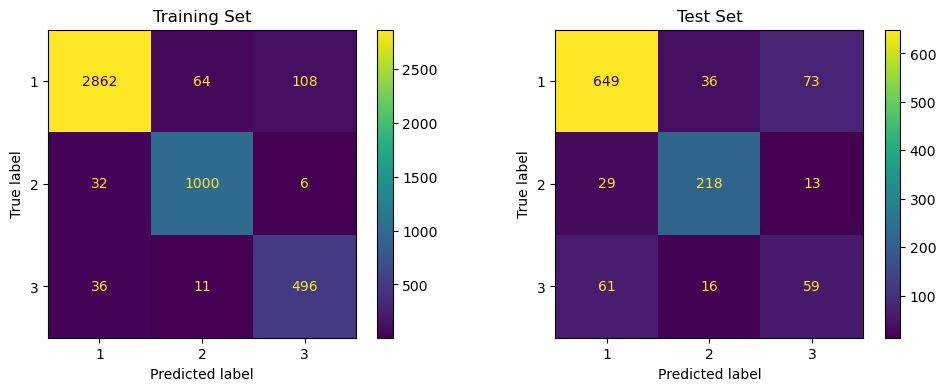


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.98      0.94      0.96      3034
           2       0.93      0.96      0.95      1038
           3       0.81      0.91      0.86       543

    accuracy                           0.94      4615
   macro avg       0.91      0.94      0.92      4615
weighted avg       0.95      0.94      0.95      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.88      0.86      0.87       758
           2       0.81      0.84      0.82       260
           3       0.41      0.43      0.42       136

    accuracy                           0.80      1154
   macro avg       0.70      0.71      0.70      1154
weighted avg       0.81      0.80      0.80      1154



In [188]:
y_pred_RF_grid = rf_grid_model.predict(X_test)
y_train_pred_RF_grid = rf_grid_model.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_RF_grid)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_RF_grid)}''')

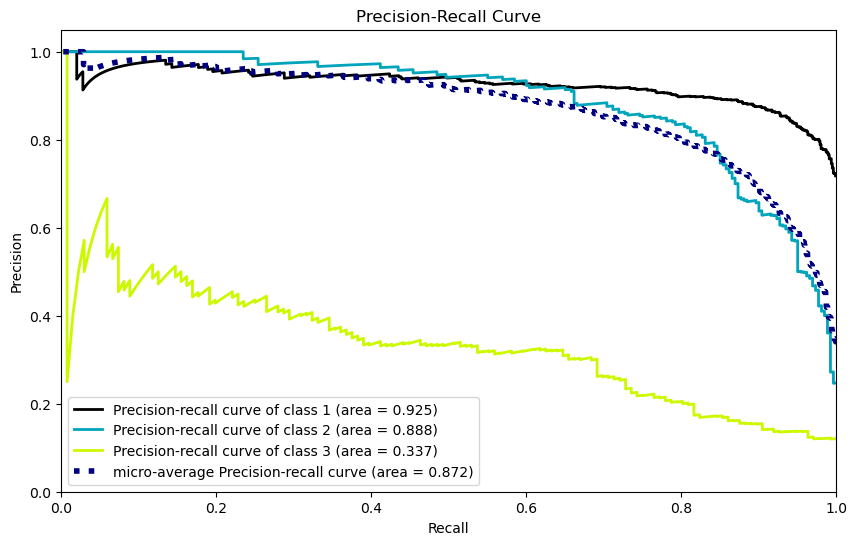

In [265]:
y_pred_proba = rf_grid_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [189]:
from xgboost import XGBClassifier

XGBoost, an optimized gradient boosting algorithm, can benefit from feature scaling, but it's not as sensitive to it as some other algorithms. You can scale your features if you want to, but it's often not a top priority when using XGBoost. The algorithm can handle features with different scales effectively.

That said, there are situations where you might choose to scale your features before fitting these models:

If you have features on significantly different scales, scaling them can help the model converge faster.
When using regularization techniques (e.g., L1 or L2 regularization) in XGBoost, it's beneficial to scale features to ensure regularization terms impact features equally.

In [190]:
xgboost_pipe =Pipeline([('Scaler',StandardScaler()),('XGB',XGBClassifier())]) 

In [191]:
xgboost_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'XGB', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'XGB__objective', 'XGB__use_label_encoder', 'XGB__base_score', 'XGB__booster', 'XGB__callbacks', 'XGB__colsample_bylevel', 'XGB__colsample_bynode', 'XGB__colsample_bytree', 'XGB__early_stopping_rounds', 'XGB__enable_categorical', 'XGB__eval_metric', 'XGB__feature_types', 'XGB__gamma', 'XGB__gpu_id', 'XGB__grow_policy', 'XGB__importance_type', 'XGB__interaction_constraints', 'XGB__learning_rate', 'XGB__max_bin', 'XGB__max_cat_threshold', 'XGB__max_cat_to_onehot', 'XGB__max_delta_step', 'XGB__max_depth', 'XGB__max_leaves', 'XGB__min_child_weight', 'XGB__missing', 'XGB__monotone_constraints', 'XGB__n_estimators', 'XGB__n_jobs', 'XGB__num_parallel_tree', 'XGB__predictor', 'XGB__random_state', 'XGB__reg_alpha', 'XGB__reg_lambda', 'XGB__sampling_method', 'XGB__scale_pos_weight', 'XGB__subsample', 'XGB__tree_method', 'XGB__validate_parameters', 'XGB__verbosity'])

    'XGB__objective': Specifies the learning task and the corresponding objective function (e.g., 'reg:squarederror' for regression or 'binary:logistic' for binary classification).

    'XGB__use_label_encoder': A boolean flag that controls whether to use label encoding for categorical features.

    'XGB__base_score': The initial prediction score of all instances.

    'XGB__booster': Determines the type of boosting model ('gbtree', 'gblinear', or 'dart').

    'XGB__callbacks': Callback functions to be applied during training.

    'XGB__colsample_bylevel': Fraction of features used in each boosting round, per level.

    'XGB__colsample_bynode': Fraction of features used in each boosting round, per node.

    'XGB__colsample_bytree': Fraction of features used in each boosting round, per tree.

    'XGB__early_stopping_rounds': If early stopping is enabled, this parameter sets the number of rounds without improvement before stopping.

    'XGB__enable_categorical': A boolean flag that indicates whether to enable categorical feature support.

    'XGB__eval_metric': The evaluation metric used during training.

    'XGB__feature_types': Specifies the types of features ('auto', 'float', 'int', 'categorical').

    'XGB__gamma': Regularization term for controlling tree complexity.

    'XGB__gpu_id': The GPU device to use for computation.

    'XGB__grow_policy': The method for growing the trees ('depthwise' or 'lossguide').

    'XGB__importance_type': The method used to compute feature importances.

    'XGB__interaction_constraints': Constraints on the interactions between features.

    'XGB__learning_rate': The step size shrinkage used in update to prevent overfitting.

    'XGB__max_bin': The maximum number of bins for histogram optimization.

    'XGB__max_cat_threshold': The maximum threshold for categories for categorical features.

    'XGB__max_cat_to_onehot': The maximum number of categories to use one-hot encoding for.

    'XGB__max_delta_step': The maximum delta step for update to handle imbalanced classes.

    'XGB__max_depth': The maximum depth of the trees in the ensemble.

    'XGB__max_leaves': The maximum number of leaves in each tree.

    'XGB__min_child_weight': Minimum sum of instance weight (hessian) needed in a child.

    'XGB__missing': The value treated as missing in the data.

    'XGB__monotone_constraints': Constraints on the monotonicity of features.

    'XGB__n_estimators': The number of boosting rounds (trees) to be built.

    'XGB__n_jobs': The number of CPU cores to use for parallel processing when fitting the model, if supported.

    'XGB__num_parallel_tree': The number of parallel trees to be built during each iteration.

    'XGB__predictor': The type of predictor algorithm to use.

    'XGB__random_state': A seed for the random number generator to ensure reproducibility.

    'XGB__reg_alpha': L1 regularization term on weights.

    'XGB__reg_lambda': L2 regularization term on weights.

    'XGB__sampling_method': The method for subsample selection.

    'XGB__scale_pos_weight': Controls the balance of positive and negative weights.

    'XGB__subsample': The fraction of training data used in each boosting round.

    'XGB__tree_method': The method for constructing trees ('auto', 'exact', 'approx', or 'hist').

    'XGB__validate_parameters': A boolean flag that indicates whether to validate the parameters.

    'XGB__verbosity': This controls the verbosity of the XGBoost training process.

In [192]:
xgboost_pipe

Pipeline(steps=[('Scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
      

In [193]:
y_train.unique()

array([1, 3, 2])

# need to make it from Zero 

In [194]:
y_train_xgb = y_train.map({1: 0, 2:1,3:2})
y_test_xgb = y_test.map({1: 0, 2:1,3:2})

In [195]:
xgboost_pipe.fit(X_train,y_train_xgb)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
      

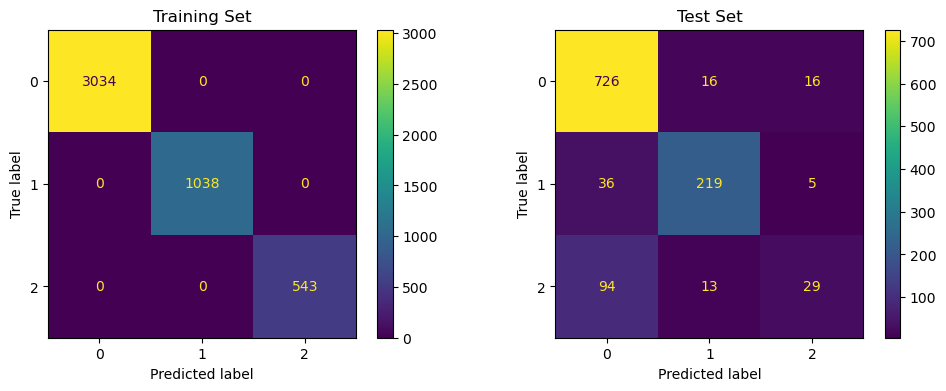


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       758
           1       0.88      0.84      0.86       260
           2       0.58      0.21      0.31       136

    accuracy                           0.84      1154
   macro avg       0.77      0.67      0.69      1154
weighted avg       0.82      0.84      0.82      1154



In [196]:
y_pred_XGB= xgboost_pipe.predict(X_test)
y_train_pred_XGB = xgboost_pipe.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(xgboost_pipe, X_train, y_train_xgb, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(xgboost_pipe, X_test, y_test_xgb, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_xgb, y_train_pred_XGB)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test_xgb, y_pred_XGB)}''')

In [197]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 1.4820167 , 0.50703142,
       1.4820167 ])

In [198]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.sample(10)

weights  label
5000  0.507031      0
3205  0.507031      0
3942  1.482017      1
3379  0.507031      0
5345  1.482017      1
2851  0.507031      0
4523  1.482017      1
1990  0.507031      0
2980  0.507031      0
3576  1.482017      1

In [199]:
comp.groupby("label").value_counts()


label  weights 
0      0.507031    3034
1      1.482017    1038
2      2.833026     543
Name: count, dtype: int64

In [200]:
scoring

{'f1r': make_scorer(f1_score, average=weighted),
 'precision': make_scorer(precision_score, average=weighted),
 'recall': make_scorer(recall_score, average=weighted)}

In [201]:
scores = cross_validate(
    xgboost_pipe,
    X_train,
    y_train_xgb,
    scoring=scoring,
    cv=5,
    n_jobs=1, # -1 = make it error beacuse i'm using all of the rams and so on 
    return_train_score=True,
    fit_params={"XGB__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1r           0.838680
train_f1r          1.000000
test_precision     0.835343
train_precision    1.000000
test_recall        0.852438
train_recall       1.000000
dtype: float64

In [202]:
df_scores

fit_time  score_time  test_f1r  train_f1r  test_precision  train_precision  \
1  2.848414    0.016540  0.841954        1.0        0.840200              1.0   
2  2.401972    0.012488  0.834265        1.0        0.828987              1.0   
3  2.365265    0.011724  0.844714        1.0        0.842427              1.0   
4  2.345557    0.011152  0.847968        1.0        0.845413              1.0   
5  2.254221    0.012527  0.824500        1.0        0.819686              1.0   

   test_recall  train_recall  
1     0.854821           1.0  
2     0.850488           1.0  
3     0.860238           1.0  
4     0.861322           1.0  
5     0.835320           1.0

In [203]:
(df_scores['train_f1r']/df_scores['test_f1r']) -1  # We can see we have overfitting for all of the folds 

1    0.187713
2    0.198660
3    0.183833
4    0.179290
5    0.212857
dtype: float64

### XGBoost Model GridsearchCV

In [204]:
xgboost_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'XGB', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'XGB__objective', 'XGB__use_label_encoder', 'XGB__base_score', 'XGB__booster', 'XGB__callbacks', 'XGB__colsample_bylevel', 'XGB__colsample_bynode', 'XGB__colsample_bytree', 'XGB__early_stopping_rounds', 'XGB__enable_categorical', 'XGB__eval_metric', 'XGB__feature_types', 'XGB__gamma', 'XGB__gpu_id', 'XGB__grow_policy', 'XGB__importance_type', 'XGB__interaction_constraints', 'XGB__learning_rate', 'XGB__max_bin', 'XGB__max_cat_threshold', 'XGB__max_cat_to_onehot', 'XGB__max_delta_step', 'XGB__max_depth', 'XGB__max_leaves', 'XGB__min_child_weight', 'XGB__missing', 'XGB__monotone_constraints', 'XGB__n_estimators', 'XGB__n_jobs', 'XGB__num_parallel_tree', 'XGB__predictor', 'XGB__random_state', 'XGB__reg_alpha', 'XGB__reg_lambda', 'XGB__sampling_method', 'XGB__scale_pos_weight', 'XGB__subsample', 'XGB__tree_method', 'XGB__validate_parameters', 'XGB__verbosity'])

In [205]:
param_grid = {
    "XGB__n_estimators": [100, 300],
    "XGB__max_depth": [1,2,5],
    "XGB__learning_rate": [0.03, 0.05],
    "XGB__subsample": [0.3, 0.8],
    "XGB__colsample_bytree": [0.5, 1],
}

In [206]:
xgboost_pipe_grid =Pipeline([('Scaler',StandardScaler()),('XGB',XGBClassifier())]) 
xgb_grid_pipe = GridSearchCV(
    xgboost_pipe_grid,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[2]),
    cv=5,
    n_jobs=1,
    return_train_score=True,
)

In [207]:
xgb_grid_pipe.fit(X_train, y_train_xgb, XGB__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('XGB',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                     

In [208]:
xgb_grid_pipe.best_params_

{'XGB__colsample_bytree': 1,
 'XGB__learning_rate': 0.05,
 'XGB__max_depth': 1,
 'XGB__n_estimators': 300,
 'XGB__subsample': 0.3}

    {'XGB__colsample_bytree': 1,
    'XGB__learning_rate': 0.05,
    'XGB__max_depth': 1,
    'XGB__n_estimators': 300,
    'XGB__subsample': 0.3}

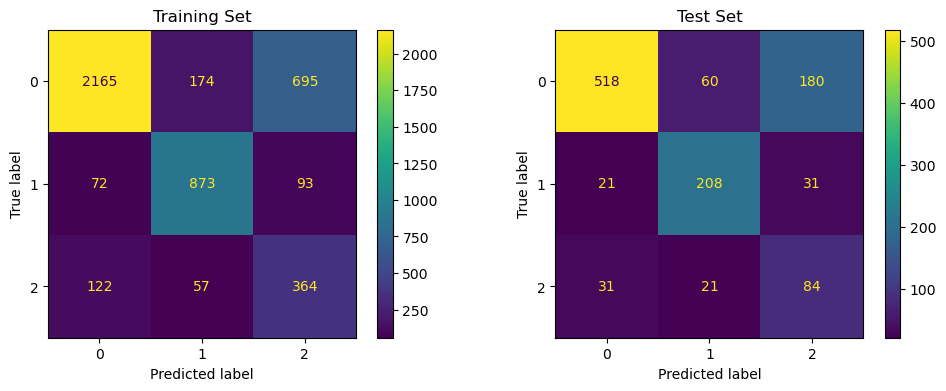


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      3034
           1       0.79      0.84      0.82      1038
           2       0.32      0.67      0.43       543

    accuracy                           0.74      4615
   macro avg       0.67      0.74      0.68      4615
weighted avg       0.82      0.74      0.76      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       758
           1       0.72      0.80      0.76       260
           2       0.28      0.62      0.39       136

    accuracy                           0.70      1154
   macro avg       0.64      0.70      0.64      1154
weighted avg       0.79      0.70      0.73      1154



In [209]:
y_pred_XGB= xgb_grid_pipe.predict(X_test)
y_train_pred_XGB = xgb_grid_pipe.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(xgb_grid_pipe, X_train, y_train_xgb, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(xgb_grid_pipe, X_test, y_test_xgb, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train_xgb, y_train_pred_XGB)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test_xgb, y_pred_XGB)}''')

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Replace with your actual model names, predictions, and true labels
models = [ rf_grid_model, svm_model_grid, grid_Logistick_pipe]
model_names = [ 'Random Forest', 'SVM', 'Logistic Regression']

train_accuracy = []
train_precision = []
train_recall = []
train_f1_score = []
train_roc_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_roc_auc = []

for model in models:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train set metrics
    train_accuracy.append(accuracy_score(y_train, train_preds))
    train_precision.append(precision_score(y_train, train_preds, average='macro'))
    train_recall.append(recall_score(y_train, train_preds, average='macro'))
    train_f1_score.append(f1_score(y_train, train_preds, average='macro'))
    
    train_roc_auc.append(roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr', average='macro'))

    # Test set  ---- 
    test_accuracy.append(accuracy_score(y_test, test_preds))
    test_precision.append(precision_score(y_test, test_preds, average='macro'))
    test_recall.append(recall_score(y_test, test_preds, average='macro'))
    test_f1_score.append(f1_score(y_test, test_preds, average='macro'))
    
    # Roc
    test_roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro'))


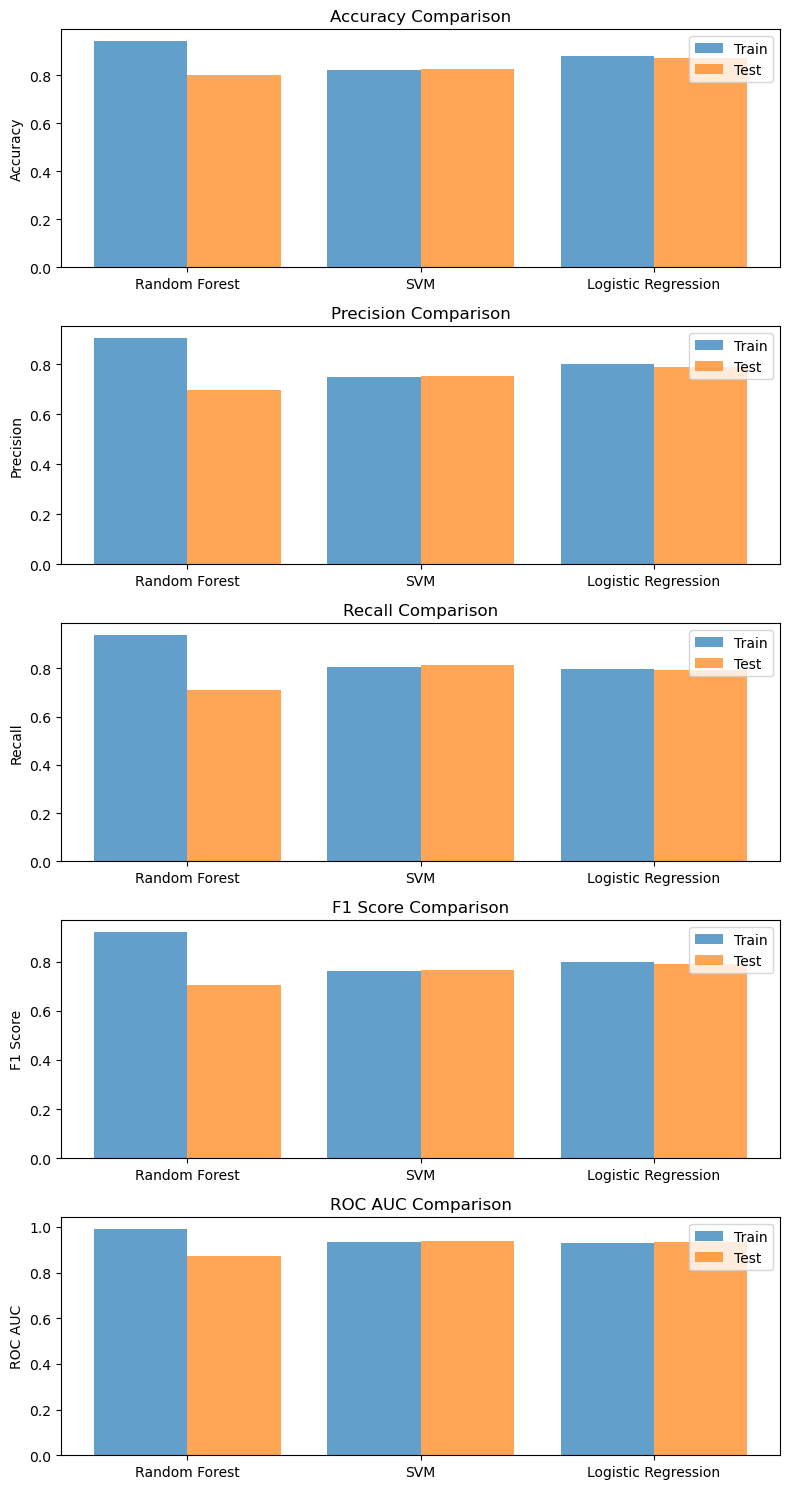

In [267]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Random Forest', 'SVM', 'Logistic Regression']

train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 15))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(np.arange(len(model_names)) - 0.2, train_metrics[i], width=0.4, label='Train', align='center', alpha=0.7)
    ax.bar(np.arange(len(model_names)) + 0.2, test_metrics[i], width=0.4, label='Test', align='center', alpha=0.7)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

plt.tight_layout()
plt.show()


## Best one is Logistick and SVM  ,,, RF we can see overfitiing 

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [212]:
# !pip install imblearn

In [213]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline as Imb_pip

In [214]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [215]:
print('''
Shape of X_train is  :      {}
Shape of X_train over is  : {}
Shape of y_train is :       {}
Shape of y_train over is :  {}
--------------each class------------------
{}
'''.format(X_train.shape,X_train_over.shape,y_train.shape,y_train_over.shape,y_train_over.value_counts()))


Shape of X_train is  :      (4615, 95)
Shape of X_train over is  : (9102, 95)
Shape of y_train is :       (4615,)
Shape of y_train over is :  (9102,)
--------------each class------------------
DODRace
1    3034
3    3034
2    3034
Name: count, dtype: int64



In [216]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [217]:
print('''
Shape of X_train is  :       {}
Shape of X_train under is  : {}
Shape of y_train is :        {}
Shape of y_train under is :  {}
--------------each class------------------
{}

'''.format(X_train.shape,X_train_under.shape,y_train.shape,y_train_under.shape, y_train_under.value_counts()))


Shape of X_train is  :       (4615, 95)
Shape of X_train under is  : (1629, 95)
Shape of y_train is :        (4615,)
Shape of y_train under is :  (1629,)
--------------each class------------------
DODRace
1    543
2    543
3    543
Name: count, dtype: int64




In [218]:
y_train.value_counts()

DODRace
1    3034
2    1038
3     543
Name: count, dtype: int64

In [219]:
over = SMOTE(sampling_strategy={3: 1000})
under = RandomUnderSampler(sampling_strategy={1: 2000})

In [220]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [221]:
steps = [("o", over), ("u", under)]


pipeline = Imb_pip(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [222]:
print('''

--------Y before-------- 
{}
--------SMote smapling--------
{}
'''.format(y_train.value_counts(),y_resampled.value_counts()))




--------Y before-------- 
DODRace
1    3034
2    1038
3     543
Name: count, dtype: int64
--------SMote smapling--------
DODRace
1    2000
2    1038
3    1000
Name: count, dtype: int64



## Logistic Regression Over/ Under Sampling

In [223]:
operations = [
    ("o", over),
    ("u", under),
    ("scaler", StandardScaler()),
    ("logistic_reg", LogisticRegression(max_iter=10000)),
] 

In [224]:
smote_pipeline = Imb_pip(steps=operations)
smote_pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2000})),
                ('scaler', StandardScaler()),
                ('logistic_reg', LogisticRegression(max_iter=10000))])

In [225]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2000})),
                ('scaler', StandardScaler()),
                ('logistic_reg', LogisticRegression(max_iter=10000))])

In [226]:
smote_pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy={3: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2000})),
                ('scaler', StandardScaler()),
                ('logistic_reg', LogisticRegression(max_iter=10000))])

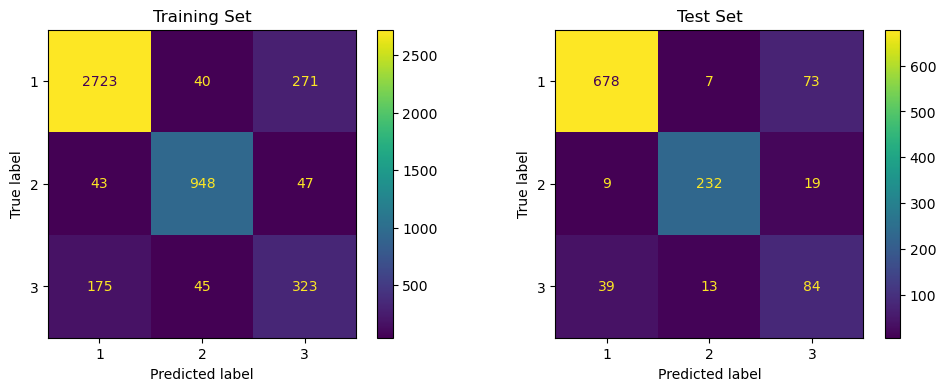


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      3034
           2       0.92      0.91      0.92      1038
           3       0.50      0.59      0.55       543

    accuracy                           0.87      4615
   macro avg       0.78      0.80      0.79      4615
weighted avg       0.87      0.87      0.87      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.93      0.89      0.91       758
           2       0.92      0.89      0.91       260
           3       0.48      0.62      0.54       136

    accuracy                           0.86      1154
   macro avg       0.78      0.80      0.79      1154
weighted avg       0.88      0.86      0.87      1154



In [227]:
y_pred_smote= smote_pipeline.predict(X_test)
y_train_pred_smote = smote_pipeline.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(smote_pipeline, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(smote_pipeline, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_smote)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_smote)}''')

In [228]:
model = Imb_pip(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

test_f1r           0.854714
train_f1r          0.871159
test_precision     0.860361
train_precision    0.876572
test_recall        0.850699
train_recall       0.867076
dtype: float64

In [229]:
df_scores

fit_time  score_time  test_f1r  train_f1r  test_precision  \
1   4.516398    0.045394  0.835196   0.869823        0.840878   
2   4.684867    0.039917  0.865873   0.871171        0.871970   
3   4.382540    0.026048  0.865157   0.872539        0.869786   
4   4.412591    0.025909  0.862775   0.871640        0.860282   
5   4.343431    0.018104  0.863056   0.872405        0.867631   
6   4.502560    0.040489  0.844972   0.872073        0.849120   
7   4.341003    0.023260  0.880141   0.867232        0.885295   
8   4.359515    0.023605  0.849906   0.873324        0.854601   
9   0.780950    0.019541  0.815300   0.873255        0.830438   
10  0.791126    0.013473  0.864764   0.868128        0.873615   

    train_precision  test_recall  train_recall  
1          0.876213     0.831169      0.865158  
2          0.877326     0.861472      0.866602  
3          0.877040     0.861472      0.869010  
4          0.877497     0.865801      0.867325  
5          0.877526     0.859307      0.868529  
6          0.876960     0.841649      0.868320  
7          0.873098     0.876356      0.862783  
8          0.877184     0.845987      0.870246  
9          0.878501     0.804772      0.869283  
10         0.874374     0.859002      0.863505

In [230]:
(df_scores['train_f1r']/df_scores['test_f1r'])-1

1     0.041460
2     0.006118
3     0.008532
4     0.010275
5     0.010832
6     0.032074
7    -0.014667
8     0.027554
9     0.071083
10    0.003890
dtype: float64

In [231]:
smote_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'o', 'u', 'scaler', 'logistic_reg', 'o__k_neighbors', 'o__n_jobs', 'o__random_state', 'o__sampling_strategy', 'u__random_state', 'u__replacement', 'u__sampling_strategy', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logistic_reg__C', 'logistic_reg__class_weight', 'logistic_reg__dual', 'logistic_reg__fit_intercept', 'logistic_reg__intercept_scaling', 'logistic_reg__l1_ratio', 'logistic_reg__max_iter', 'logistic_reg__multi_class', 'logistic_reg__n_jobs', 'logistic_reg__penalty', 'logistic_reg__random_state', 'logistic_reg__solver', 'logistic_reg__tol', 'logistic_reg__verbose', 'logistic_reg__warm_start'])

In [232]:
param_grid = { "logistic_reg__class_weight" : ["balanced", None],
               'logistic_reg__penalty': ["l1","l2"],
               'logistic_reg__solver' : ['saga','lbfgs','liblinear'],
               'logistic_reg__C' :[0.001,0.01, 0.1, 1, 5, 10, 15, 20, 25]
             }
f1_Hispanic =  make_scorer(f1_score, average=None, labels=[3])# Class 3 represent the Hispanic which is the worst scoring for our model and we need to foucs on it 
# Average can be (weighted, macro) if wanna foucse on one of these and so on 


In [233]:
grid_Logistick_smote_pipe = GridSearchCV(smote_pipeline, param_grid = param_grid,scoring=f1_Hispanic, cv=5, return_train_score=True,n_jobs=-1)


In [234]:
grid_Logistick_smote_pipe.fit(X_train,y_train)

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/v

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('o',
                                        SMOTE(sampling_strategy={3: 1000})),
                                       ('u',
                                        RandomUnderSampler(sampling_strategy={1: 2000})),
                                       ('scaler', StandardScaler()),
                                       ('logistic_reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logistic_reg__C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20,
                                             25],
                         'logistic_reg__class_weight': ['balanced', None],
                         'logistic_reg__penalty': ['l1', 'l2'],
                         'logistic_reg__solver': ['saga', 'lbfgs',
                                                  'liblinear']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None,

In [235]:
grid_Logistick_smote_pipe.best_params_

{'logistic_reg__C': 1,
 'logistic_reg__class_weight': None,
 'logistic_reg__penalty': 'l2',
 'logistic_reg__solver': 'liblinear'}

    Best parameter for the somte part : 
    
    {'logistic_reg__C': 0.1,
    'logistic_reg__class_weight': None,
    'logistic_reg__penalty': 'l2',
    'logistic_reg__solver': 'liblinear'}

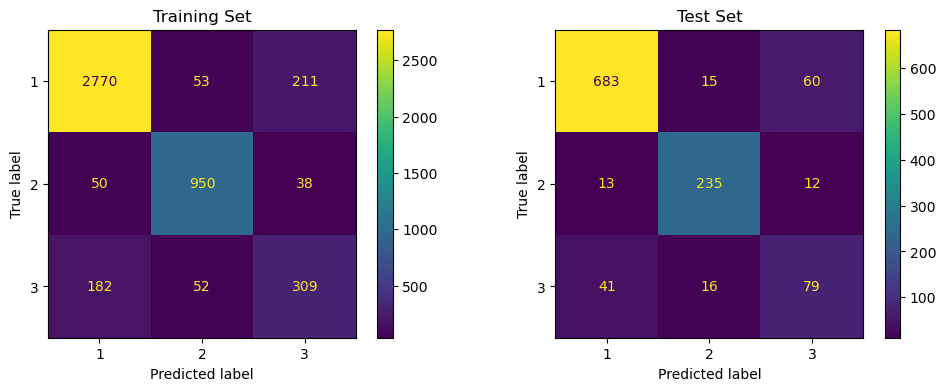


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           1       0.92      0.91      0.92      3034
           2       0.90      0.92      0.91      1038
           3       0.55      0.57      0.56       543

    accuracy                           0.87      4615
   macro avg       0.79      0.80      0.80      4615
weighted avg       0.87      0.87      0.87      4615

                        
-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           1       0.93      0.90      0.91       758
           2       0.88      0.90      0.89       260
           3       0.52      0.58      0.55       136

    accuracy                           0.86      1154
   macro avg       0.78      0.80      0.79      1154
weighted avg       0.87      0.86      0.87      1154



In [236]:
y_pred_smote= grid_Logistick_smote_pipe.predict(X_test)
y_train_pred_smote = grid_Logistick_smote_pipe.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(grid_Logistick_smote_pipe, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(grid_Logistick_smote_pipe, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()

print(f'''
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred_smote)}
                        
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred_smote)}''')

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Replace with your actual model names, predictions, and true labels
models = [grid_Logistick_pipe, rf_grid_model, svm_model_grid, grid_Logistick_smote_pipe]
model_names = ['Logistick', 'Random Forest', 'SVM', 'Smote Logistic Regression']

train_accuracy = []
train_precision = []
train_recall = []
train_f1_score = []
train_roc_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_roc_auc = []

for model in models:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train set metrics
    train_accuracy.append(accuracy_score(y_train, train_preds))
    train_precision.append(precision_score(y_train, train_preds, average='macro'))
    train_recall.append(recall_score(y_train, train_preds, average='macro'))
    train_f1_score.append(f1_score(y_train, train_preds, average='macro'))
    
    train_roc_auc.append(roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr', average='macro'))

    # Test set  ---- 
    test_accuracy.append(accuracy_score(y_test, test_preds))
    test_precision.append(precision_score(y_test, test_preds, average='macro'))
    test_recall.append(recall_score(y_test, test_preds, average='macro'))
    test_f1_score.append(f1_score(y_test, test_preds, average='macro'))
    
    # Roc
    test_roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro'))


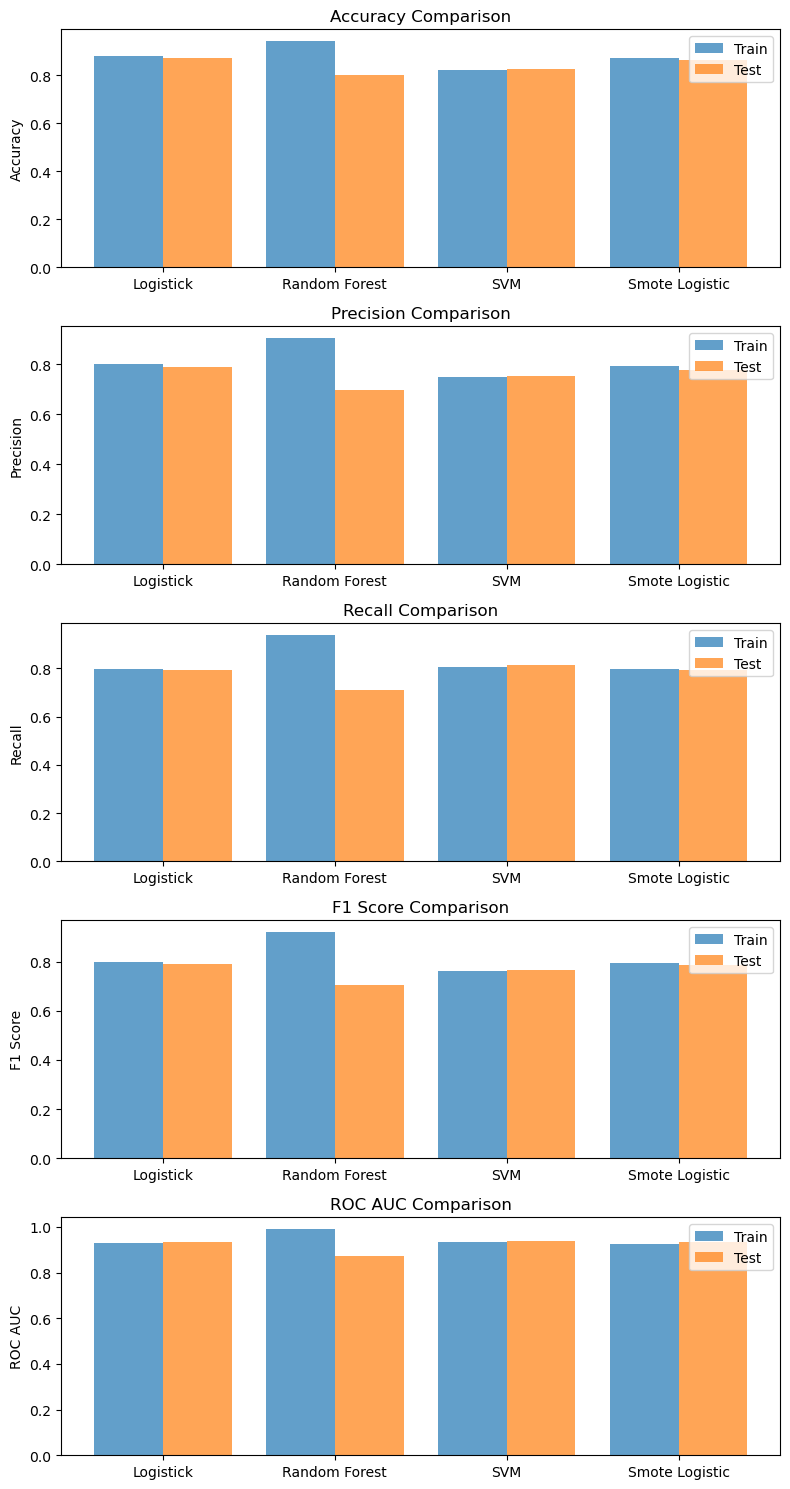

In [271]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistick', 'Random Forest', 'SVM',  'Smote Logistic']

train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 15))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(np.arange(len(model_names)) - 0.2, train_metrics[i], width=0.4, label='Train', align='center', alpha=0.7)
    ax.bar(np.arange(len(model_names)) + 0.2, test_metrics[i], width=0.4, label='Test', align='center', alpha=0.7)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

plt.tight_layout()
plt.show()


## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [239]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.756373095827538

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground 

In [240]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7512132637581908

# SHAP

In [242]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 774.9 kB/s eta 0:00:00a 0:00:01


        {'logistic_model__C': 0.1,
                'logistic_model__class_weight': 'balanced',
                'logistic_model__penalty': 'l2',
                'logistic_model__solver': 'liblinear'}

In [243]:
STD = StandardScaler()

X_train_trans = STD.fit_transform(X_train)
X_test_trans = STD.transform(X_test)

Shap_model = LogisticRegression(
    class_weight="balanced",
    max_iter=10000,
    C=0.1,
    random_state=13,
    penalty="l2",
    solver="liblinear",
)

Shap_model.fit(X_train_trans, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000,
                   random_state=13, solver='liblinear')

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

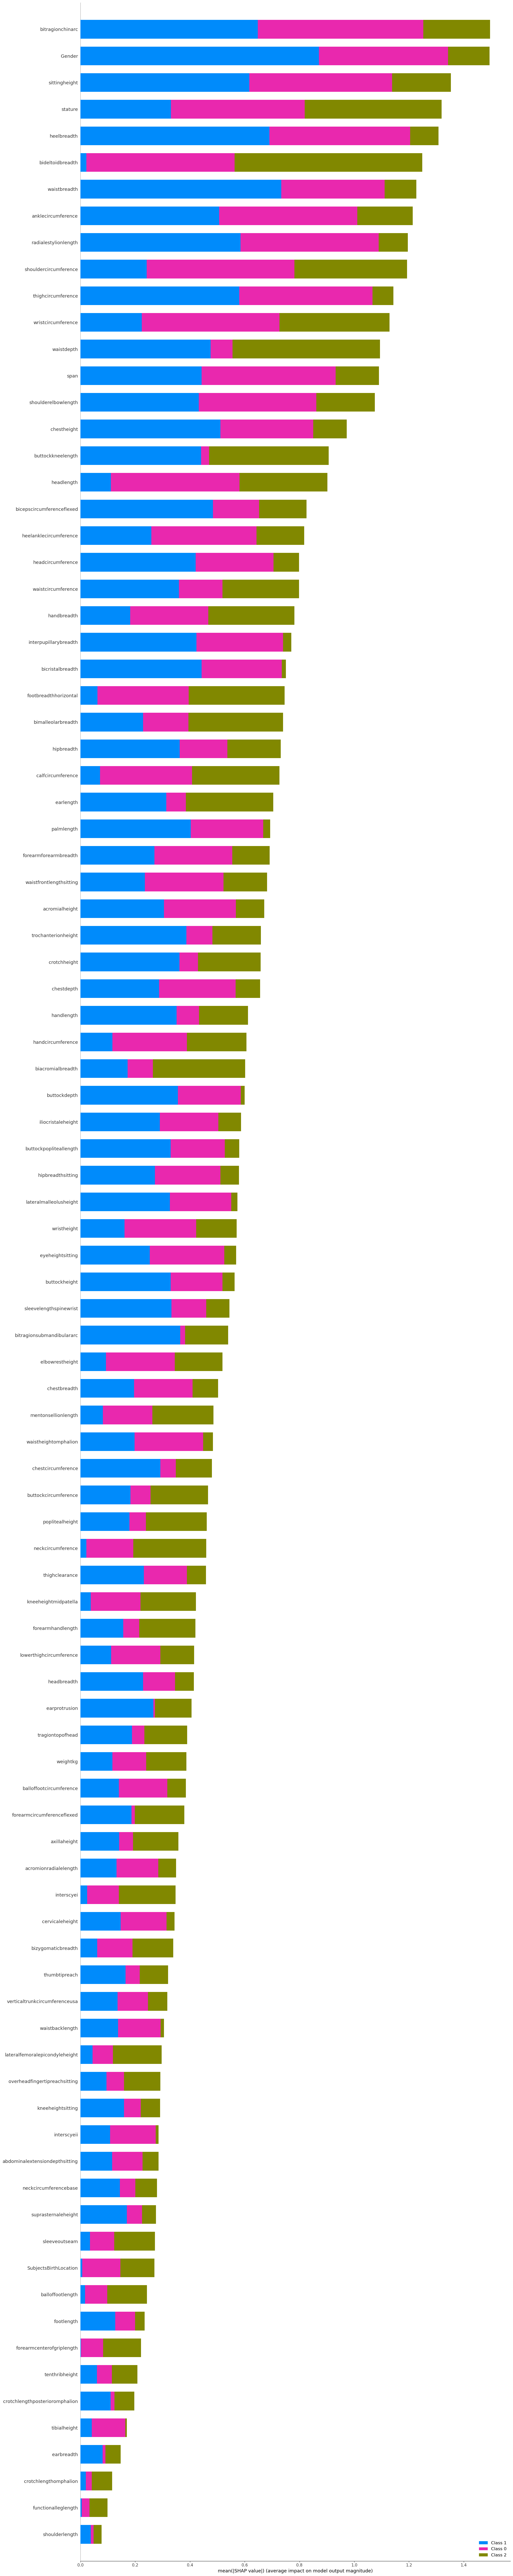

In [246]:
import shap
explainer = shap.LinearExplainer(Shap_model, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300,feature_names= X.columns, plot_size=(20, 100)
)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___